## Today you are a Machine Learning Engineer at the Department of Business Intelligence at Target Cosmetics!
This work relies on processed data from Kaggle https://www.kaggle.com/mkechinov/ecommerce-events-history-in-cosmetics-shop

This work is motivated by the publication https://arxiv.org/pdf/2010.02503.pdf

You have access to the Target server data, specifically the Cosmetics section, such that you have NO customer facing information, but, only access to timestamped data regarding product viewing/carting/purchasing.


### The user-journey data regarding user-product interaction is given to you as follows:

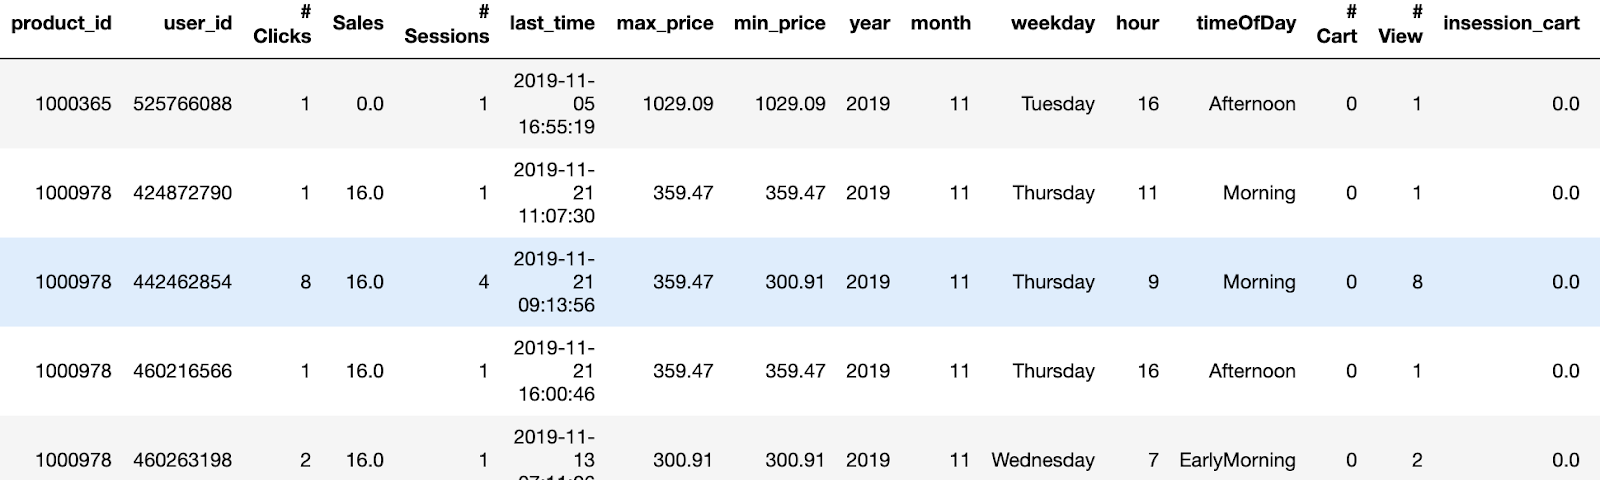

In [1]:
from IPython.display import Image
Image(filename='image10.png')

## The data above has been wrangled and converted to one-hot encoded format for this exercise.
## You have access to first 250,000 user-journeys only and you have been asked to create a proof of concept analysis based on this data. Your task is to perform the following:
### A. Find patterns between customer purchasing behaviors to identify categories of customers. I.e. how many categories of customers are there based on their purchasing rates? We have repeat customers here since people buy other cosmetics based on their past purchases.

### B.Visually inspect the customer categories to identify the distinctive categories and their corresponding descriptive features.

### Task 0: Getting familiar with the data set

In [2]:
## Importing required Libraries
import os
import tensorflow as tf
from tensorboard.plugins import projector
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sb

In /Users/leo/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/leo/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In /Users/leo/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [3]:
## Get working directory
PATH = os.getcwd()
## Path to save the embedding and checkpoints generated
LOG_DIR = PATH + '/project-tensorboard/'
if not os.path.exists(LOG_DIR):
    os.mkdir(LOG_DIR)
LOG_DIR = PATH + '/project-tensorboard/log-1'
if not os.path.exists(LOG_DIR):
    os.mkdir(LOG_DIR)

In [4]:
PATH

'/Users/leo/Documents/ML/Courses/FourthBrain/Week3'

In [5]:
LOG_DIR

'/Users/leo/Documents/ML/Courses/FourthBrain/Week3/project-tensorboard/log-1'

In [6]:
df = pd.read_csv("Cosmetics_data_2019.csv")

np.shape(df)

(250000, 36)

In [7]:
import matplotlib.pyplot as plt
YY=df.loc[:,'Purchase'].values
print(f'Percentage of interactions resulting in a purchase = {(np.sum(YY)/len(YY))*100}')

Percentage of interactions resulting in a purchase = 12.0684


### Exercise: Set the target vector y equal to the `'Purchase'` column of the DataFrame and the features array X equal to the remaining columns, minus `'user_id'` and `'product_id'`. Drop those two columns from the original DataFrame as well.

In [8]:
### START CODE HERE ###
X  = df[[col for col in df.columns if col not in ['Purchase', 'user_id', 'product_id']]]
y  = df['Purchase']
df = df.drop(columns=['user_id', 'product_id'])
### END CODE HERE ###
# Display the first few rows of the modified DataFrame
df.head()

,NumOfEventsInJourney,NumSessions,interactionTime,maxPrice,minPrice,NumCart,NumView,NumRemove,InsessionCart,InsessionView,...,Nov,Dec,Afternoon,Dawn,EarlyMorning,Evening,Morning,Night,Noon,Purchase
0,2,2,4749,19.03,19.03,0,1,1,1,2,...,1,0,0,0,0,0,1,0,0,0
1,1,1,0,4.60,4.60,0,1,0,0,1,...,1,0,1,0,0,0,0,0,0,0
2,1,1,0,35.71,35.71,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3,1,1,0,2.94,2.94,1,0,0,13,13,...,1,0,0,0,1,0,0,0,0,0
4,1,1,0,5.22,5.22,0,1,0,0,3,...,0,0,0,0,0,1,0,0,0,0


### Use a library of functions (`helper_functions.py`) to carry out essential tasks such as feature selection

### Using a separate library of functions increases modularity of the code without the need to copy and paste code to the notebook

In [9]:
from helper_functions import *

## Task 1: Select top features to separate purchasing vs non purchasing customers.
### You can modify the functions in helper_functions to include OLS and other feature selection mentods.
### Remember to reload the kernel (restart jupyternotebook) if you make any change to helper functions.

### Exercise: Calculate, print, and plot the feature importances, in descending order of importance. Call the appropriate function from helper_functions.py here..

Feature ranking:
1. feature 7 (0.171403)
2. feature 0 (0.168439)
3. feature 5 (0.117723)
4. feature 6 (0.101453)
5. feature 2 (0.082864)
6. feature 1 (0.062956)
7. feature 10 (0.054205)
8. feature 8 (0.053166)
9. feature 4 (0.044448)
10. feature 3 (0.042576)
11. feature 9 (0.042194)
12. feature 18 (0.004516)
13. feature 26 (0.004165)
14. feature 16 (0.004153)
15. feature 13 (0.004037)
16. feature 15 (0.003799)
17. feature 12 (0.003794)
18. feature 14 (0.003670)
19. feature 28 (0.003655)
20. feature 17 (0.003609)
21. feature 27 (0.002778)
22. feature 31 (0.002557)
23. feature 29 (0.002411)
24. feature 32 (0.002275)
25. feature 25 (0.002271)
26. feature 30 (0.002067)
27. feature 23 (0.001911)
28. feature 21 (0.001789)
29. feature 22 (0.001690)
30. feature 24 (0.001622)
31. feature 19 (0.000926)
32. feature 20 (0.000880)
33. feature 11 (0.000000)


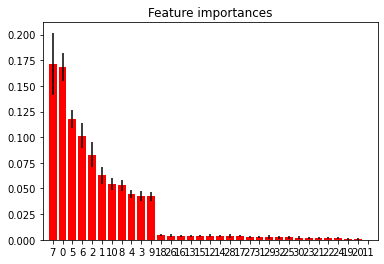

In [10]:
### START CODE HERE ###
indices, importances = return_feature_rank_from_RF(X, y)
### END CODE HERE ###

### Exercise: Select features with weight > 0.025 
### 0.025 is a significant cutoff point based on the graph above, hence its choice for this exercise.
## Note: Weight cutoff is a relative process for each data set and the threshold (0.025 here) varies across data sets.

In [11]:
### START CODE HERE ###
# Extract the indices corresponding to a feature importance > 0.025
idx = [i for i in indices if importances[i] > 0.025]
# Extract the names of the associated feature columns
selected_columns = df.columns[idx]
### END CODE HERE ###
print(idx)
print(selected_columns)

[7, 0, 5, 6, 2, 1, 10, 8, 4, 3, 9]
Index(['NumRemove', 'NumOfEventsInJourney', 'NumCart', 'NumView',
       'interactionTime', 'NumSessions', 'InsessionRemove', 'InsessionCart',
       'minPrice', 'maxPrice', 'InsessionView'],
      dtype='object')


### Exercise: Use the selected columns as your training data

In [12]:
### START CODE HERE ###
X_train = df[selected_columns]
y_train = y
### END CODE HERE ###
print(X_train.shape)

(250000, 11)


### Task 2: Apply dimensionality reduction (to speed up) and clustering. Analyze optimal number of clusters using PCA vs. t-SNE. But complete this exercise using PCA only.
### t-SNE is very slow, so verify performance (#clusters) for 10k samples using PCA and t-SNE

### [OPTION 1]: apply PCA followed by Elbow method and Yellowbrick clustering

### Exercise: Compute a reduced features dataset with 5 principal components

In [15]:
### START CODE HERE ###
pca = PCA(n_components=5, random_state=0).fit(X_train)
X_red = pca.transform(X_train)
### END CODE HERE ###
print(X_red.shape)

(250000, 5)


### Exercise: Apply $k$-means clustering with $k \in [1, 20]$ to the reduced features data. Visualize the associated distortion scores and computational times.

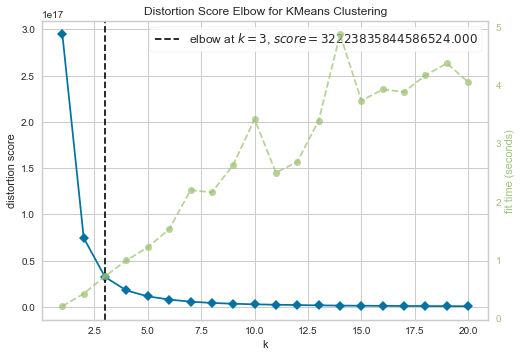

In [16]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

### START CODE HERE ###
# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1, 21))
# Fit the visualizer to the reduced features data
visualizer.fit(X_red)
### END CODE HERE ###
visualizer.show() 

### [OPTION 2]: Apply t-SNE followed by Elbow method and Yellowbrick clustering. 

### Exercise: Assume 3 components to be extracted and perplexity of 2. This can take a long time. Use first 10k samples to speed up.

In [54]:
import sklearn.manifold
### START CODE HERE ###
tsne_op = sklearn.manifold.TSNE(n_components=3, perplexity=2, random_state=0)
X_red_t = tsne_op.fit_transform(X_train.values[:10000, :])
### END CODE HERE ###

### Exercise: Apply $k$-means clustering with $k \in [1, 20]$ to the t-SNE reduced features data. Visualize the associated distortion scores and computational times.

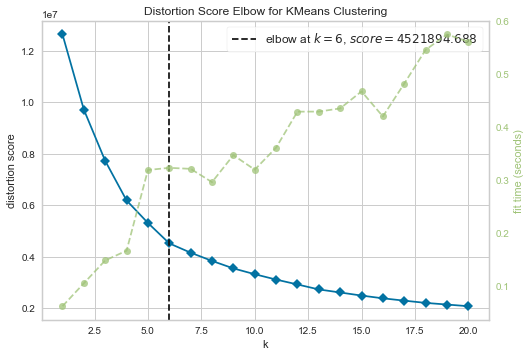

In [55]:
### START CODE HERE ###
# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1, 21))
# Fit the visualizer to the t-SNE reduced features data
visualizer.fit(X_red_t)        
### END CODE HERE ###
visualizer.show() 
# Ideally you should have similar optimal cluster numbers for both PCA and t-SNE

### Exercise: Assign cluster IDs to all the PCA-reduced data samples and store the new data as a csv [before Lunch Break]

In [17]:
### START CODE HERE 
#Enter the optimal number of clusters here from the Elbow method
n = 3
# Instantiate the clustering model
clusters = KMeans(n_clusters=3, random_state=0).fit(X_train)
# Assign the points in the reduced dataset to clusters
C_vals = clusters.predict(X_train)
### END CODE HERE ###
print(np.unique(C_vals))

[0 1 2]


### Save the data and associated clusters

In [18]:
X_save = pd.DataFrame(df[selected_columns])
X_save['Purchase'] = df.iloc[:,-1]
X_save['ClusterID'] = C_vals
X_save.head()

,NumRemove,NumOfEventsInJourney,NumCart,NumView,interactionTime,NumSessions,InsessionRemove,InsessionCart,minPrice,maxPrice,InsessionView,Purchase,ClusterID
0,1,2,0,1,4749,2,6,1,19.03,19.03,2,0,0
1,0,1,0,1,0,1,0,0,4.60,4.60,1,0,0
2,0,1,0,1,0,1,0,0,35.71,35.71,1,0,0
3,0,1,1,0,0,1,16,13,2.94,2.94,13,0,0
4,0,1,0,1,0,1,0,0,5.22,5.22,3,0,0


In [19]:
X_save.to_csv('Clustered_data_cosmetics_tsne.csv', index=False)

### Task 3: Visualize the clusters [Instructor Led]
Jupyter notebook + Google colab version https://colab.research.google.com/drive/1-PUVjf4eNO8QzF27lbBg6OT-yTNlBgD7

In [20]:
#Load the clustered data and visualize using tensorboard
X_train = pd.read_csv("Clustered_data_cosmetics_tsne.csv")
X=X_train.iloc[:,0:-2].values

X_train.head()

,NumRemove,NumOfEventsInJourney,NumCart,NumView,interactionTime,NumSessions,InsessionRemove,InsessionCart,minPrice,maxPrice,InsessionView,Purchase,ClusterID
0,1,2,0,1,4749,2,6,1,19.03,19.03,2,0,0
1,0,1,0,1,0,1,0,0,4.60,4.60,1,0,0
2,0,1,0,1,0,1,0,0,35.71,35.71,1,0,0
3,0,1,1,0,0,1,16,13,2.94,2.94,13,0,0
4,0,1,0,1,0,1,0,0,5.22,5.22,3,0,0


In [21]:
pca=PCA(n_components=5)
X1=pca.fit_transform(X)
print(X1.shape)

(250000, 5)


In [22]:
#version 1
def register_embedding(embedding_tensor_name, meta_data_fname, log_dir):
    config = projector.ProjectorConfig()
    embedding = config.embeddings.add()
    embedding.tensor_name = embedding_tensor_name
    embedding.metadata_path = meta_data_fname
    projector.visualize_embeddings(log_dir, config)

def save_labels_tsv(labels, filepath, log_dir):
    with open(os.path.join(log_dir, filepath), 'w') as f:
        for label in labels:
            f.write('{}\n'.format(label))


In [23]:
META_DATA_FNAME = 'meta_cos_reduction1.tsv'  # Labels will be stored here
EMBEDDINGS_TENSOR_NAME = 'sample_data_cos_reduction1'
EMBEDDINGS_FPATH = os.path.join(LOG_DIR, EMBEDDINGS_TENSOR_NAME + '.ckpt')
STEP = 0

register_embedding(EMBEDDINGS_TENSOR_NAME, META_DATA_FNAME, LOG_DIR)
save_labels_tsv(C_vals, META_DATA_FNAME, LOG_DIR)#version 1

In [24]:
tf.compat.v1.disable_eager_execution()
tensor_embeddings = tf.Variable(X1, name=EMBEDDINGS_TENSOR_NAME)
sess = tf.compat.v1.InteractiveSession()
sess.run(tf.compat.v1.global_variables_initializer())
saver = tf.compat.v1.train.Saver()
saver.save(sess, EMBEDDINGS_FPATH, STEP)
sess.close()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


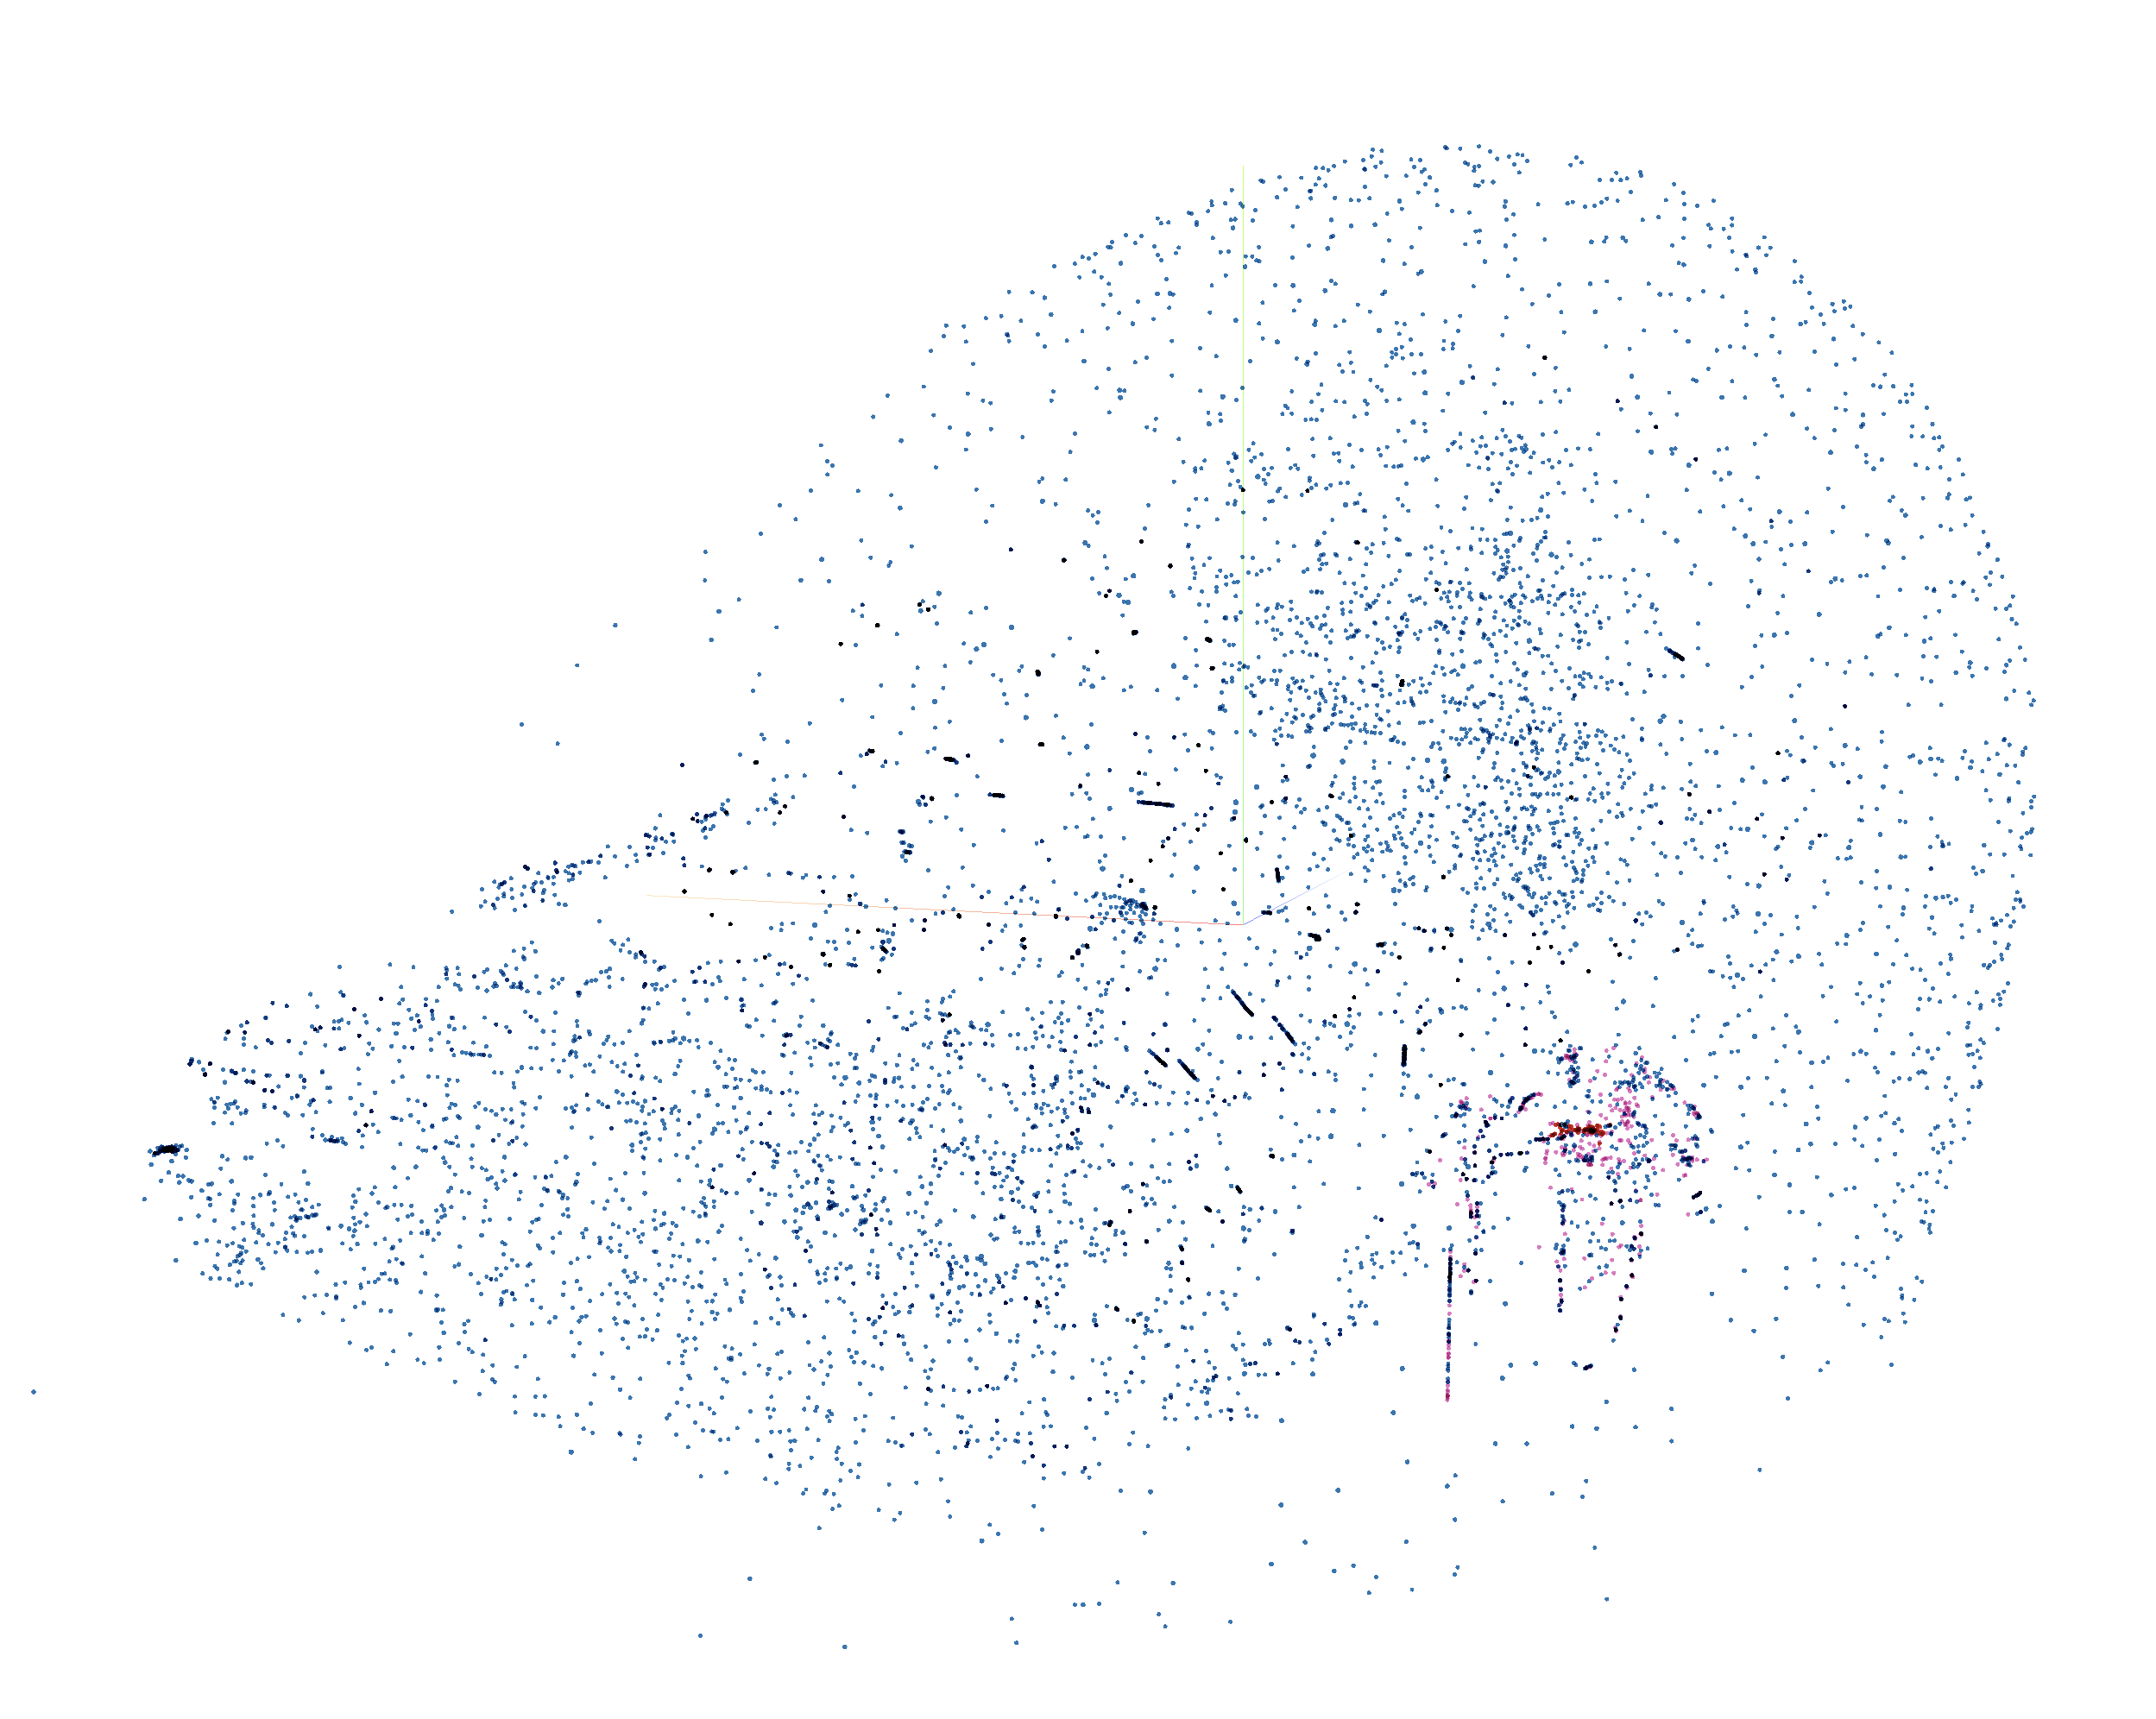

In [25]:
#Attach an image of the optimal clusters and their relative position in t-SNE
from IPython.display import Image
Image(filename='t-SNE_plot.png') 

### Comments
You can see the red and pink clusters tightly packed in the bottom right, and the blue cluster scattered all around.

### Task 4: Analysis of clusters.
Now that the records have been clustered, do the following 2 tasks:
1. Do the different clusters vary in their purchase ratio? If so by how much?
2. Plot the discriminating charecteristics of each feature to separate purchase vs not-purchase events [Hint: Seaborn plot]

### Exercise: Find the unique cluster IDs

In [26]:
### START CODE HERE ###
# Get all the values in the 'ClusterID' column
column_values = X_train['ClusterID']
# Compute the unique cluster ID values
unique_values_a = np.unique(X_train['ClusterID'])
# Sort the unique cluster ID values
unique_values = np.sort(unique_values_a)
### END CODE HERE ###
print(unique_values)

[0 1 2]


### Exercise: For each cluster, calculate the representation percentage (i.e. what percentage of the dataset's samples belong to that cluster) and purchase percentage (i.e. what percentage of samples in each cluster resulted in a purchase)

In [27]:
### START CODE HERE ###
# Initialize the percentages as arrays of zeros, with each zero representing a unique cluster ID
purchase_percentage = np.zeros(unique_values.shape)
representation_percentage = np.zeros(unique_values.shape)
# Loop through the clusters
for index, item in enumerate(unique_values):
    locations = np.where(X_train['ClusterID'] == item)[0]
    purchase = X_train['Purchase'][locations]
    representation_percentage[index] = 100 * locations.shape[0] / X_train.shape[0]
    purchase_percentage[index] = 100 * sum(purchase) / locations.shape[0]
### END CODE HERE ###

Representation Percentage= [94.2088  1.4724  4.3188]
Purchase Percentage= [11.52333965 26.10703613 19.17199222]


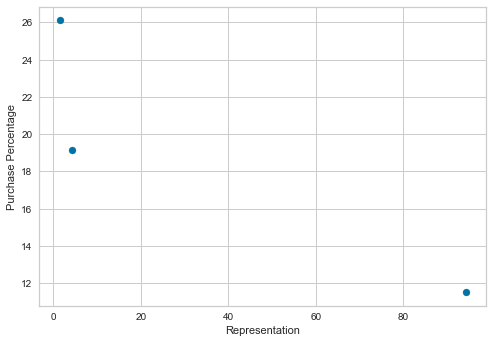

In [28]:
print('Representation Percentage=',(representation_percentage))
print('Purchase Percentage=',purchase_percentage)
import matplotlib.pyplot as plt
plt.scatter(representation_percentage,purchase_percentage)
plt.xlabel('Representation')
plt.ylabel('Purchase Percentage')
plt.show()

In [29]:
print(np.sum(purchase_percentage))

56.80236799710042


In [30]:
total_purchase=X_train.loc[X_train['Purchase']==1]

In [31]:
purchase_distrib=total_purchase.shape[0]/X_train.shape[0]
print(purchase_distrib*100)

12.0684


# This implies that cluster 0 represents 94% of the samples and has purchase ratio most similar to the overall purchase ratio. However, there exist smaller clusters with 1.4%, 4.3% population representation that represent higher purchase ratios (customers in those clusters are more sure to buy)

/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


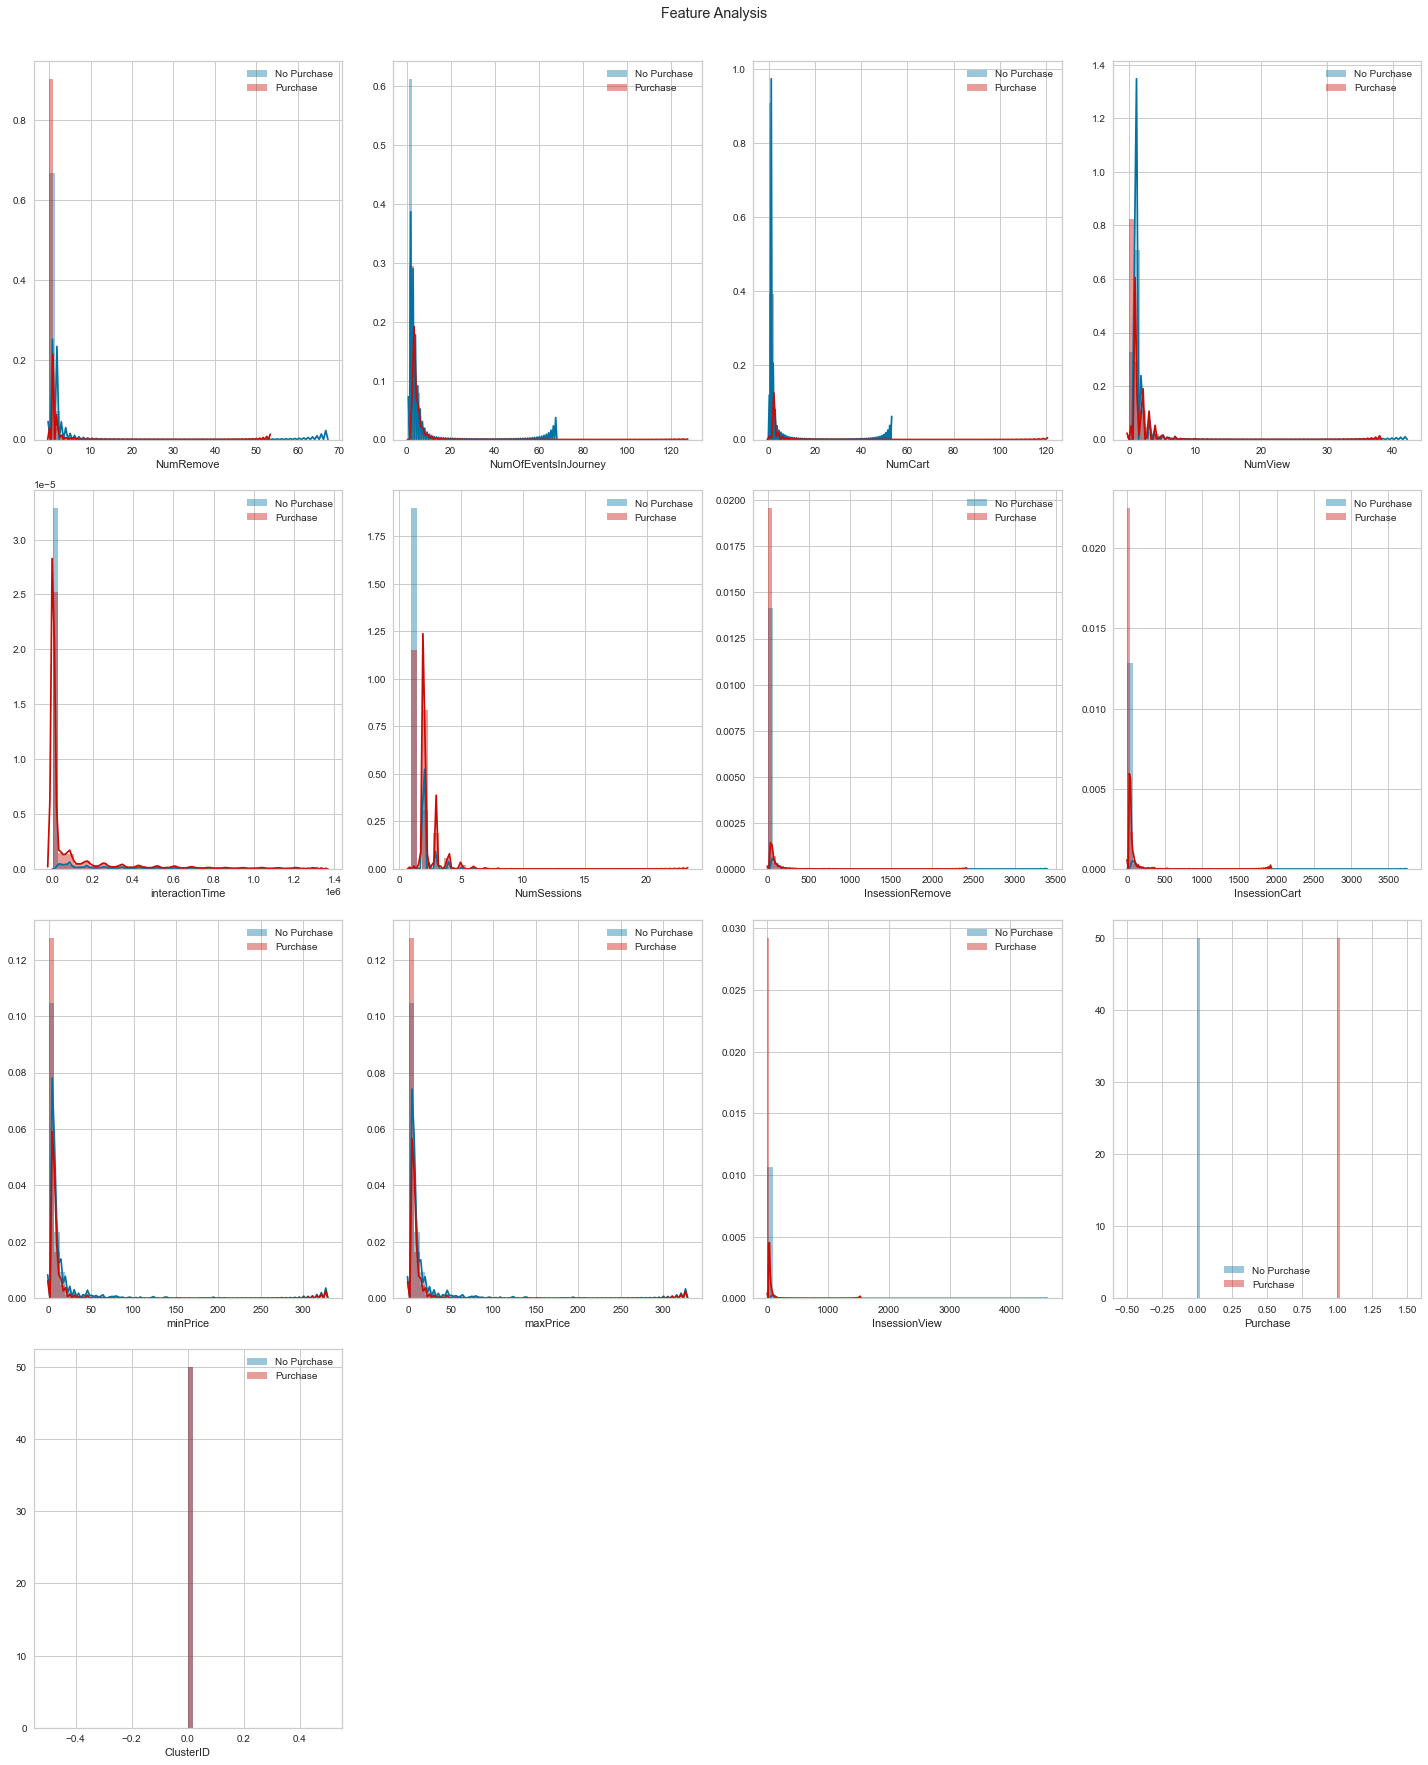

In [32]:
# Next, to analyze composition of each cluster
#Cluster 0
result = X_train.loc[X_train['ClusterID'] == 0]


fig = plt.figure(figsize = (20, 25))
j = 0
for i,item in enumerate(result.columns):
    plt.subplot(4, 4, j+1)
    j += 1
#     if(i==12):
#          sb.countplot(x='weekday', hue='Purchase', data=result)
#     elif(i==13):
#          sb.countplot(x='timeOfDay', hue='Purchase', data=result)
#     else:
#         item=None
    sb.distplot(result[item][result['Purchase']==0], color='b', label = 'No Purchase')
    sb.distplot(result[item][result['Purchase']==1], color='r', label = 'Purchase')
    plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


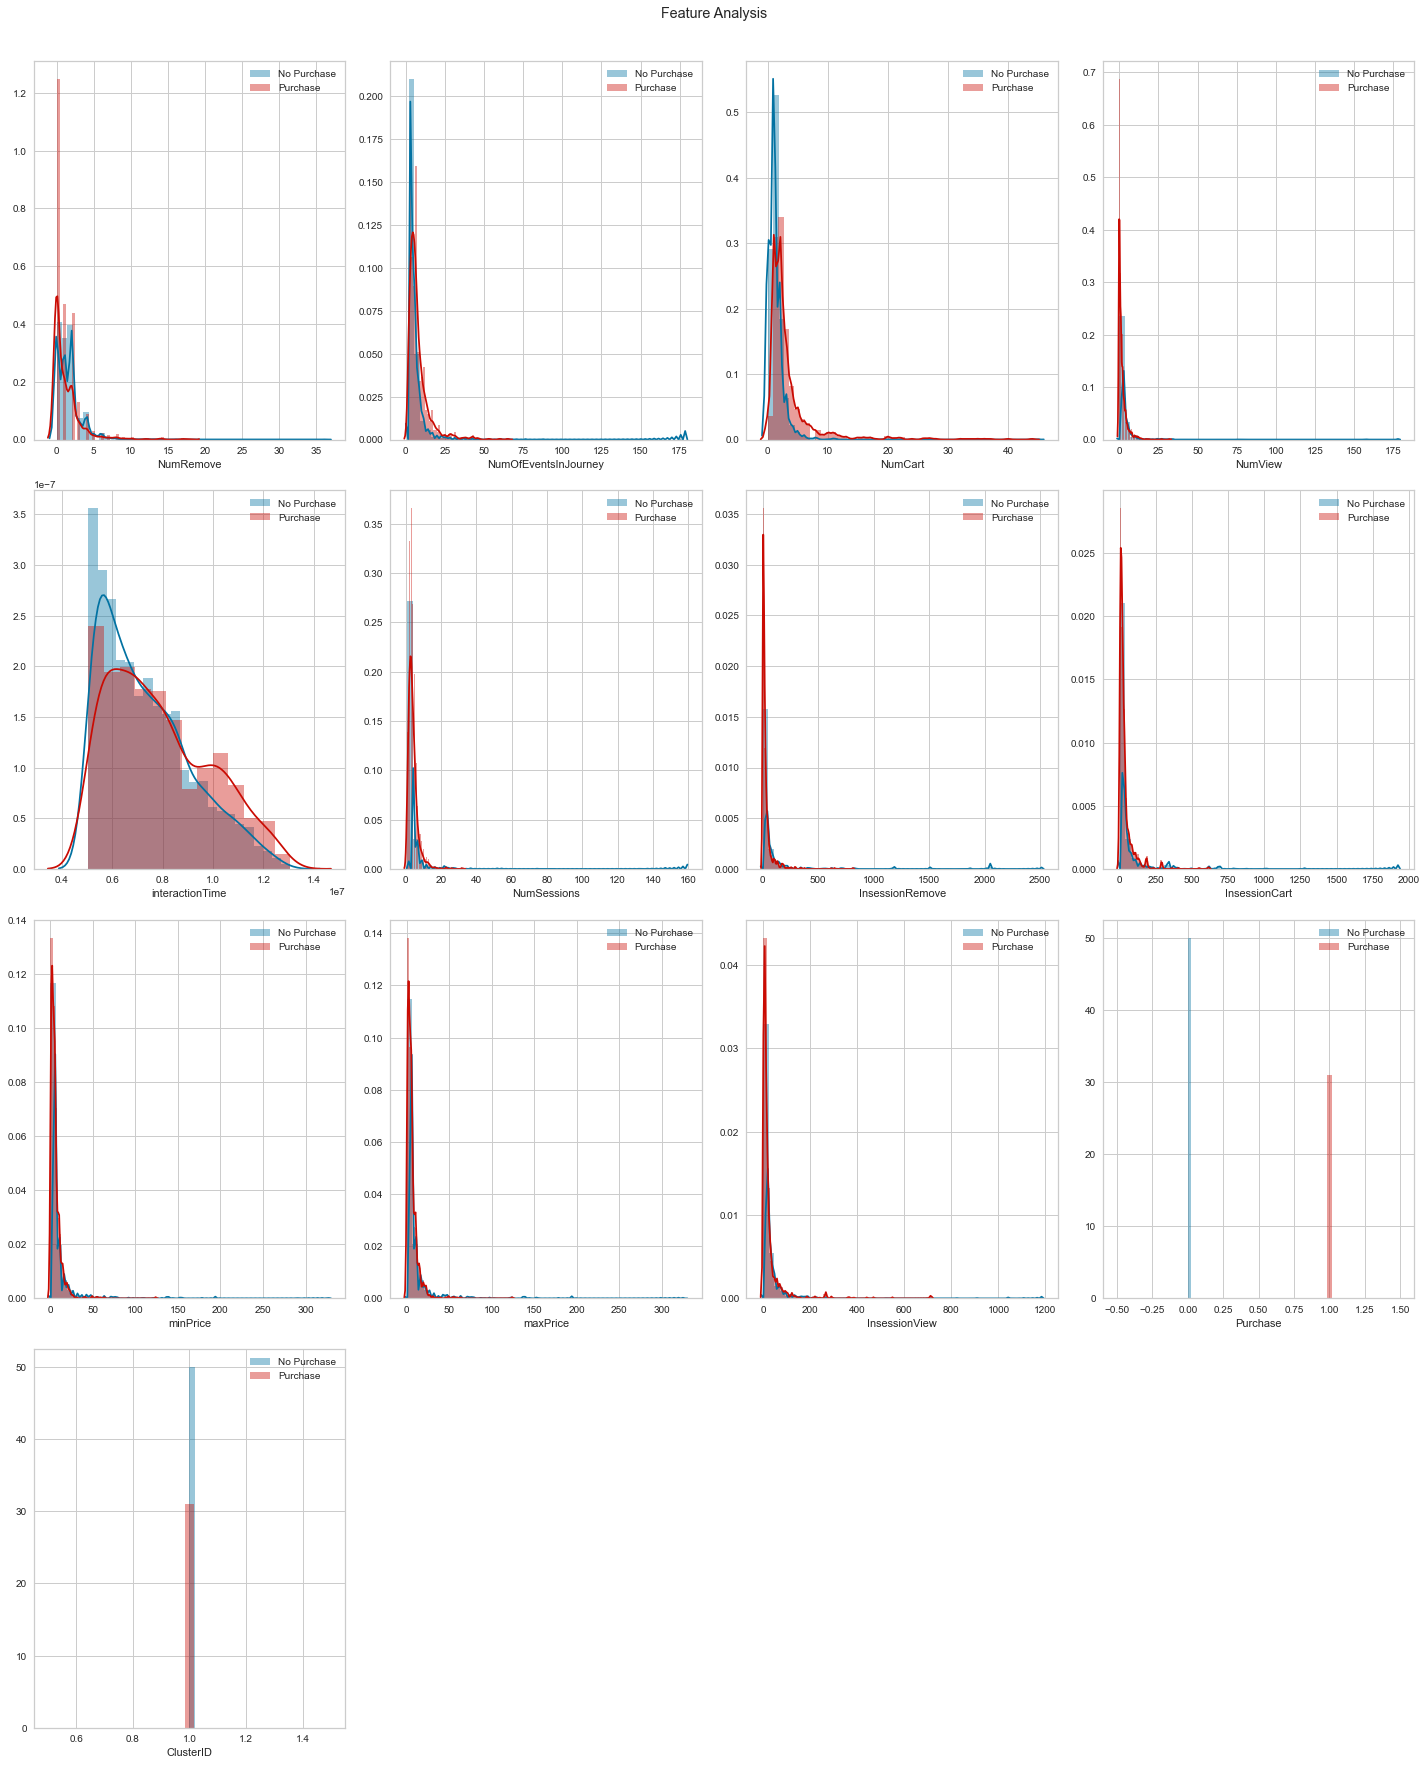

In [33]:
#Cluster 1
result = X_train.loc[X_train['ClusterID'] == 1]


fig = plt.figure(figsize = (20, 25))
j = 0
for i,item in enumerate(result.columns):
    plt.subplot(4, 4, j+1)
    j += 1

    sb.distplot(result[item][result['Purchase']==0], color='b', label = 'No Purchase')
    sb.distplot(result[item][result['Purchase']==1], color='r', label = 'Purchase')
    plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()
    

/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


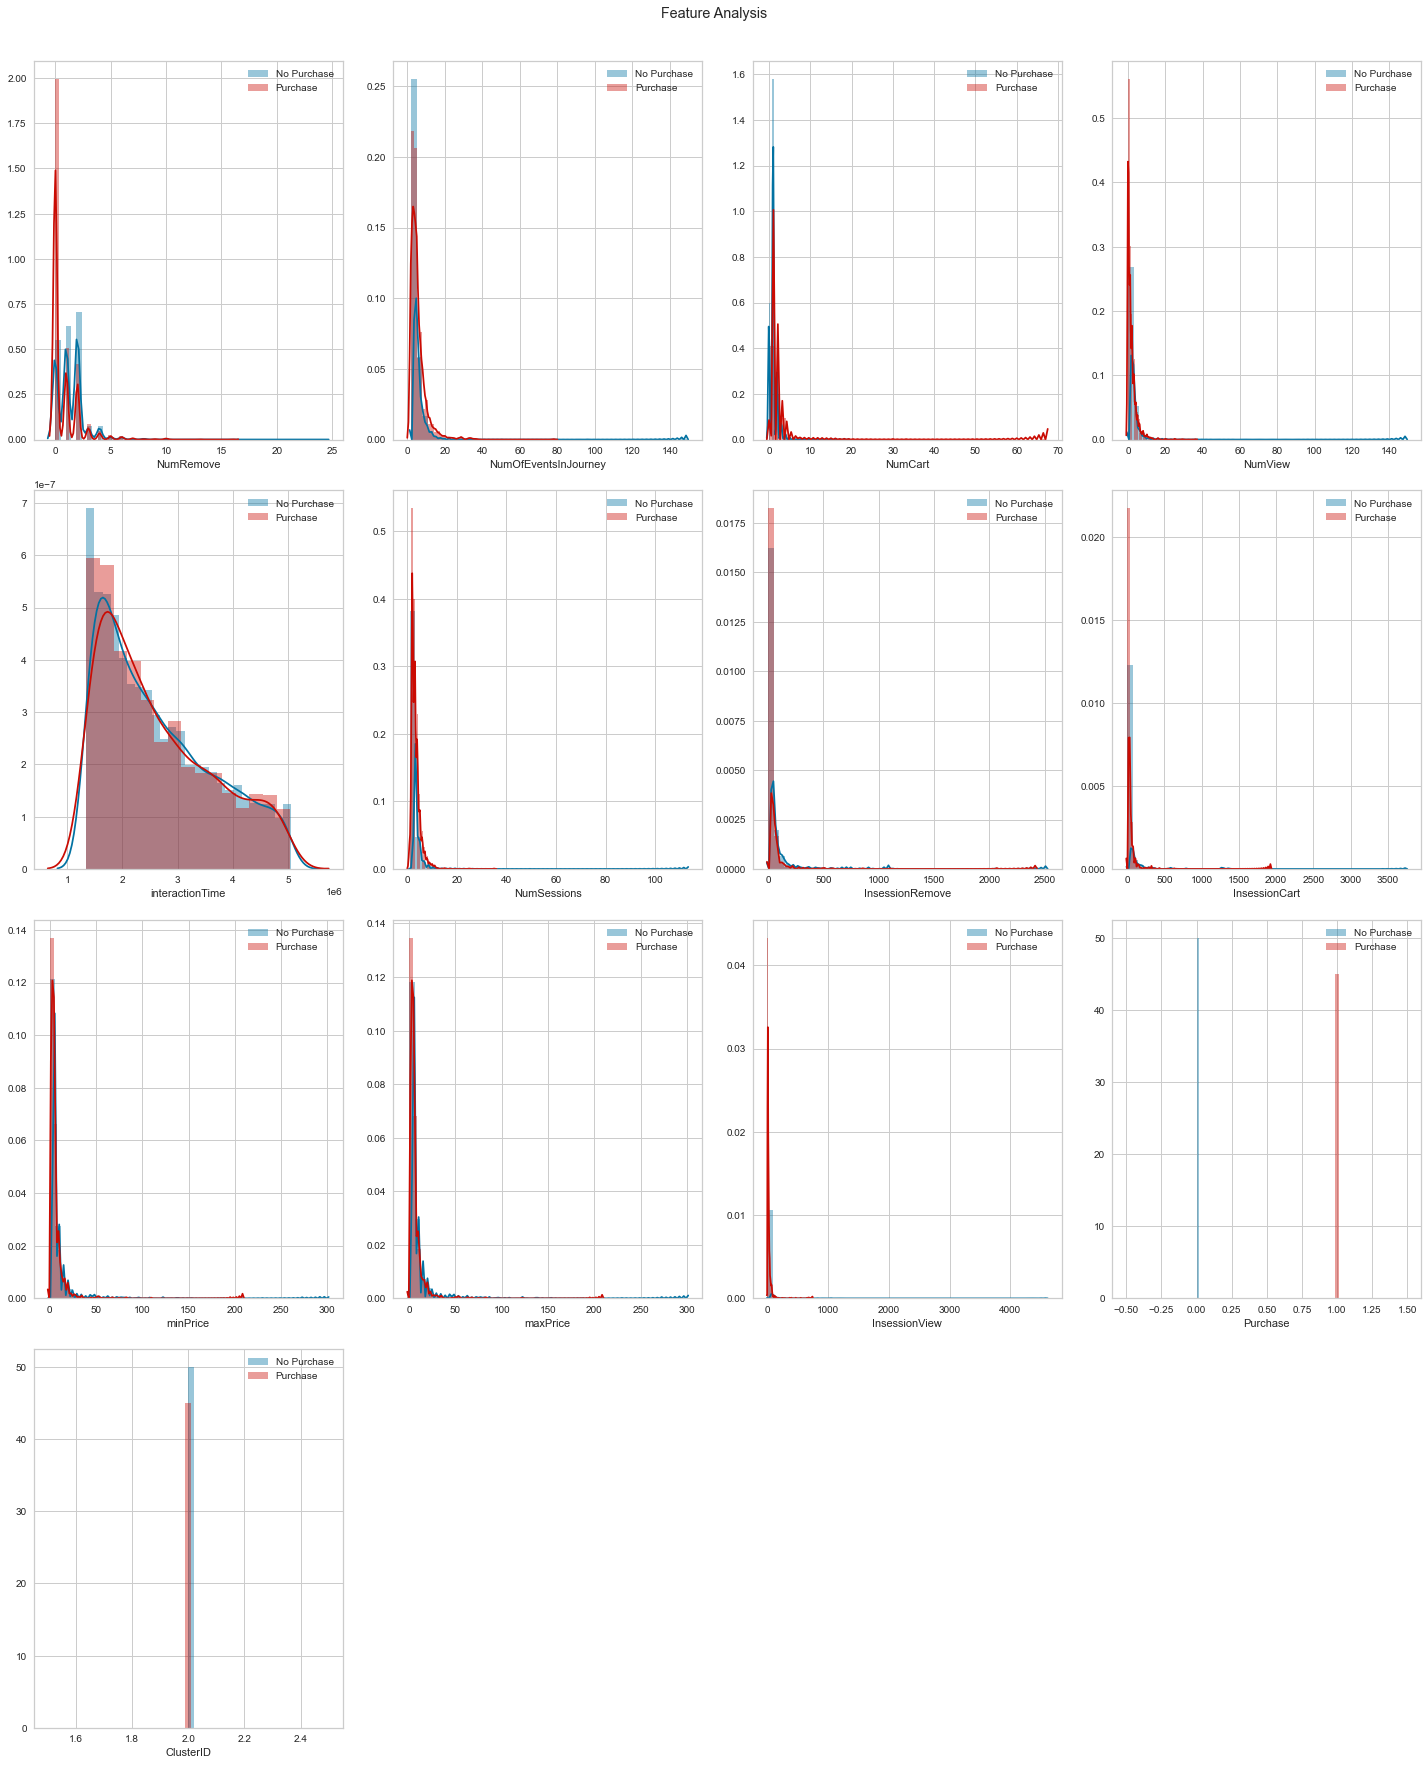

In [34]:
#Cluster 2
result = X_train.loc[X_train['ClusterID'] == 2]


fig = plt.figure(figsize = (20, 25))
j = 0
for i,item in enumerate(result.columns):
    plt.subplot(4, 4, j+1)
    j += 1
#     if(i==12):
#          sb.countplot(x='weekday', hue='Purchase', data=result)
#     elif(i==13):
#          sb.countplot(x='timeOfDay', hue='Purchase', data=result)
#     else:
#         item=None
    sb.distplot(result[item][result['Purchase']==0], color='b', label = 'No Purchase')
    sb.distplot(result[item][result['Purchase']==1], color='r', label = 'Purchase')
    plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

### Exercise: Comment on which features are most dissimilar across clusters

#### Cluster 0: Browsers (representation: 94%, purchase: 11%)

These customers spend little time on the site (lowest interaction time). They have fewer removes, although a small fraction of customers remove a large number of items. The number of items in their carts is low. Customers in this group are browsing, with no plans to purchase items. They make few purchases.

#### Cluster 1: Impulse Buyers (representation: 1.5%, purchase: 26%)

These customers spend a long time on the site (highest interaction time). They have fewer removes. The number of items in their carts is higher. Customers in this group are looking around for nothing in particular, but are willing to buy items that catch their eye.

#### Cluster 2: Focused Shoppers (representation: 4.3%, purchase: 19%)

These customers spend a long time on the site, but less than the previous group (high interaction time). They have more removes. The number of items in their carts is low. Customers in this group are methodical shoppers who are looking for a specific item, and are ready to buy it.

# Extra Credit

## Summary contains consolidated information

## 1. Apply DBSCAN to PCA-reduced data samples to allocate cluster IDs to all 250k samples.

In [102]:
pca = PCA(n_components=3, random_state=0).fit(X_train)
X_red_p = pca.transform(X_train)
print(X_red_p.shape)

(250000, 3)


## DBSCAN: 2 (useful) clusters

In [119]:
# Played around with these parameters to get a reasonable number of clusters.
dbscan = DBSCAN(eps=0.5, min_samples=2).fit(X_red_p)
value_counts = np.unique(dbscan.labels_, return_counts=True)
unique_values = value_counts[0]
print('Number of clusters: {0}'.format(max(dbscan.labels_) + 1))
print('Value count:\n{0}\n{1}'.format(value_counts[0], value_counts[1][:10]))

Number of clusters: 5002
Value count:
[  -1    0    1 ... 4999 5000 5001]
[103894 124447    156      4      2      2      7      4      4      2]


In [120]:
X_pca = pd.DataFrame(df[selected_columns])
X_pca['Purchase'] = df.iloc[:,-1]
X_pca['ClusterID'] = dbscan.labels_
print(X_pca.shape)
X_pca.head()

(250000, 13)


,NumRemove,NumOfEventsInJourney,NumCart,NumView,interactionTime,NumSessions,InsessionRemove,InsessionCart,minPrice,maxPrice,InsessionView,Purchase,ClusterID
0,1,2,0,1,4749,2,6,1,19.03,19.03,2,0,-1
1,0,1,0,1,0,1,0,0,4.60,4.60,1,0,0
2,0,1,0,1,0,1,0,0,35.71,35.71,1,0,0
3,0,1,1,0,0,1,16,13,2.94,2.94,13,0,0
4,0,1,0,1,0,1,0,0,5.22,5.22,3,0,0


In [121]:
# Initialize the percentages as arrays of zeros, with each zero representing a unique cluster ID
purchase_percentage = np.zeros(unique_values.shape)
representation_percentage = np.zeros(unique_values.shape)
# Loop through the clusters
for index, item in enumerate(unique_values):
    locations = np.where(dbscan.labels_ == item)[0]
    purchase = X_pca['Purchase'][locations]
    representation_percentage[index] = 100 * locations.shape[0] / X_pca.shape[0]
    purchase_percentage[index] = 100 * sum(purchase) / locations.shape[0]

Representation Percentage= [4.15576e+01 4.97788e+01 6.24000e-02 ... 8.00000e-04 8.00000e-04
 8.00000e-04]
Total representation= 99.99999999998906
Purchase Percentage= [27.04583518  1.09845959  0.         ...  0.          0.
  0.        ]
Total weighted purchase percentage= 12.068399999999997


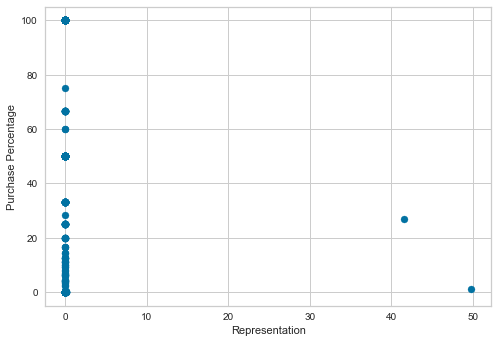

In [122]:
print('Representation Percentage=',(representation_percentage))
print('Total representation=', sum(representation_percentage))
print('Purchase Percentage=',purchase_percentage)
print('Total weighted purchase percentage=', np.dot(representation_percentage, purchase_percentage) / 100)
import matplotlib.pyplot as plt
plt.scatter(representation_percentage,purchase_percentage)
plt.xlabel('Representation')
plt.ylabel('Purchase Percentage')
plt.show()

/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


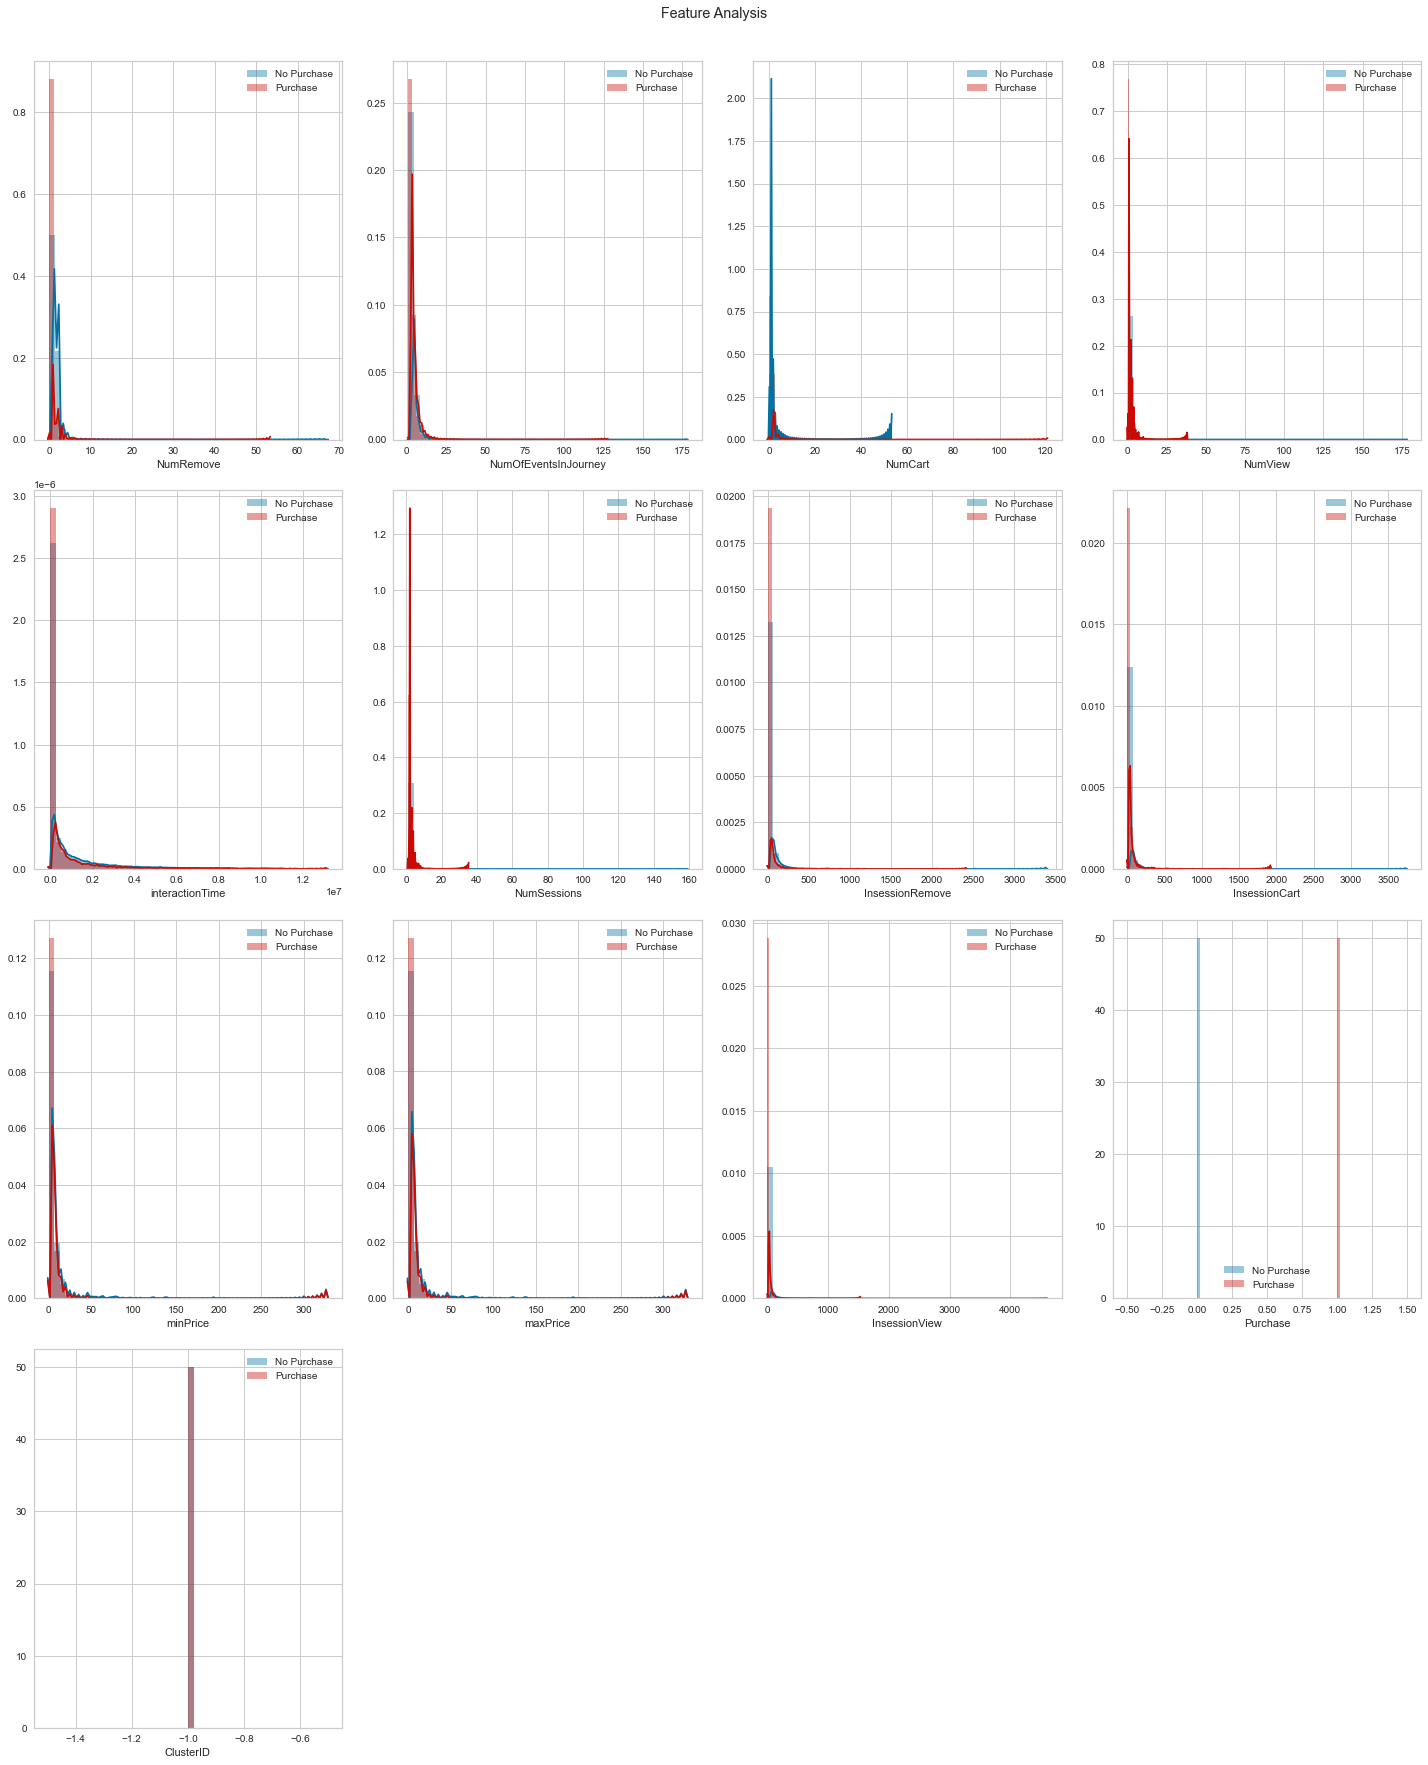

In [126]:
# Next, to analyze composition of each cluster
#Cluster -1
result = X_pca.loc[X_pca['ClusterID'] == -1]


fig = plt.figure(figsize = (20, 25))
j = 0
for i,item in enumerate(result.columns):
    plt.subplot(4, 4, j+1)
    j += 1
#     if(i==12):
#          sb.countplot(x='weekday', hue='Purchase', data=result)
#     elif(i==13):
#          sb.countplot(x='timeOfDay', hue='Purchase', data=result)
#     else:
#         item=None
    sb.distplot(result[item][result['Purchase']==0], color='b', label = 'No Purchase')
    sb.distplot(result[item][result['Purchase']==1], color='r', label = 'Purchase')
    plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/dis

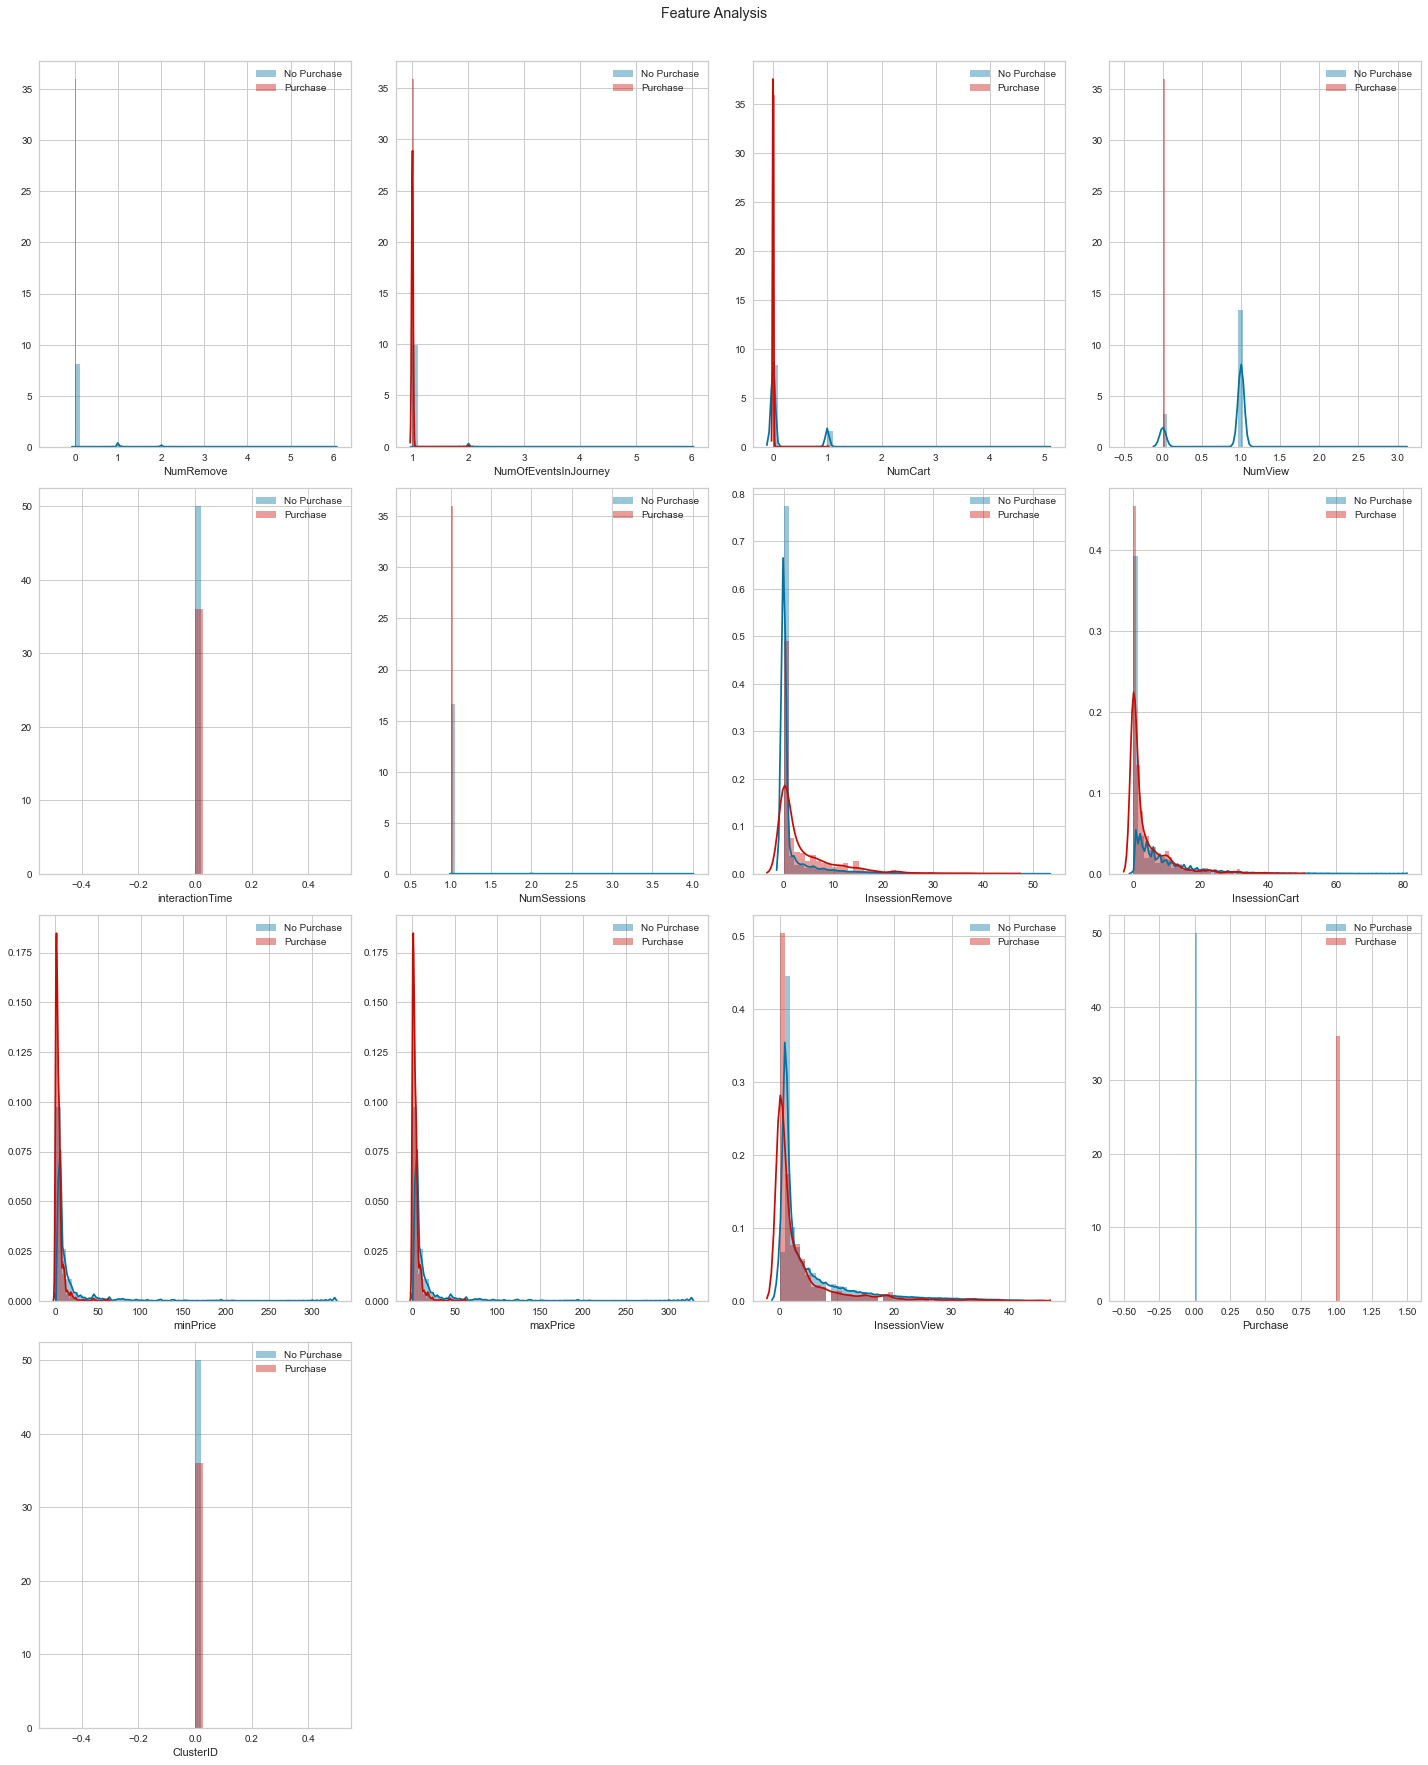

In [127]:
# Next, to analyze composition of each cluster
#Cluster 0
result = X_pca.loc[X_pca['ClusterID'] == 0]


fig = plt.figure(figsize = (20, 25))
j = 0
for i,item in enumerate(result.columns):
    plt.subplot(4, 4, j+1)
    j += 1
#     if(i==12):
#          sb.countplot(x='weekday', hue='Purchase', data=result)
#     elif(i==13):
#          sb.countplot(x='timeOfDay', hue='Purchase', data=result)
#     else:
#         item=None
    sb.distplot(result[item][result['Purchase']==0], color='b', label = 'No Purchase')
    sb.distplot(result[item][result['Purchase']==1], color='r', label = 'Purchase')
    plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

## 1.d. Top 2 discriminating features to separate purchase from no-purchase per cluster
### Cluster -1 (even though this is for outliers, we'll treat it as a cluster for the sake of analysis):
Almost all of the purchases are categorized as outliers. NumRemove (no purchase is greater), NumCart (no purchase is greater)
### Cluster 0:
NumView (no purchase has 1 at far greater frequency), InSessionRemove (no purchase has fewer)

## 2. Apply either k-means or DBSCAN to t-SNE-reduced data samples to allocate cluster IDs to all 250k samples. Use the full dataset during t-SNE.

In [35]:
import sklearn.manifold
tsne_op = sklearn.manifold.TSNE(n_components=3, perplexity=2, random_state=0)
X_red_t = tsne_op.fit_transform(X_train.values)

### k-means: 6 clusters

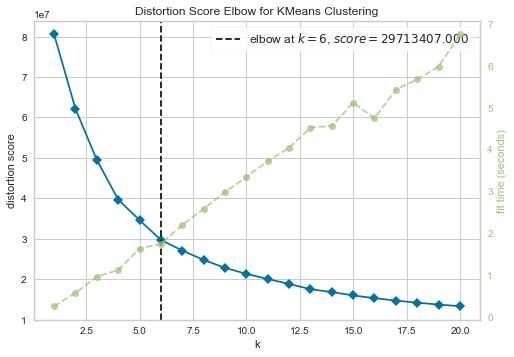

In [38]:
# Instantiate the clustering model and visualizer
model = KMeans(random_state=0)
visualizer = KElbowVisualizer(model, k=(1, 21))
# Fit the visualizer to the t-SNE reduced features data
visualizer.fit(X_red_t)        
visualizer.show()

In [73]:
#Enter the optimal number of clusters here from the Elbow method
n = 6
# Instantiate the clustering model
clusters = KMeans(n_clusters=n, random_state=0).fit(X_red_t)
# Assign the points in the reduced dataset to clusters
C_vals = clusters.predict(X_red_t)
### END CODE HERE ###
print(np.unique(C_vals))

[0 1 2 3 4 5]


In [75]:
X_tsne = pd.DataFrame(df[selected_columns])
X_tsne['Purchase'] = df.iloc[:,-1]
X_tsne['ClusterID'] = C_vals
print(X_tsne.shape)
X_tsne.head()

(250000, 13)


,NumRemove,NumOfEventsInJourney,NumCart,NumView,interactionTime,NumSessions,InsessionRemove,InsessionCart,minPrice,maxPrice,InsessionView,Purchase,ClusterID
0,1,2,0,1,4749,2,6,1,19.03,19.03,2,0,4
1,0,1,0,1,0,1,0,0,4.60,4.60,1,0,1
2,0,1,0,1,0,1,0,0,35.71,35.71,1,0,1
3,0,1,1,0,0,1,16,13,2.94,2.94,13,0,3
4,0,1,0,1,0,1,0,0,5.22,5.22,3,0,2


In [76]:
# Get all the values in the 'ClusterID' column
column_values = X_tsne['ClusterID']
# Compute the unique cluster ID values
unique_values_a = np.unique(X_tsne['ClusterID'])
# Sort the unique cluster ID values
unique_values = np.sort(unique_values_a)
### END CODE HERE ###
print(unique_values)

[0 1 2 3 4 5]


In [77]:
# Initialize the percentages as arrays of zeros, with each zero representing a unique cluster ID
purchase_percentage = np.zeros(unique_values.shape)
representation_percentage = np.zeros(unique_values.shape)
# Loop through the clusters
for index, item in enumerate(unique_values):
    locations = np.where(X_tsne['ClusterID'] == item)[0]
    purchase = X_tsne['Purchase'][locations]
    representation_percentage[index] = 100 * locations.shape[0] / X_tsne.shape[0]
    purchase_percentage[index] = 100 * sum(purchase) / locations.shape[0]

Representation Percentage= [16.5756 16.6712 16.9392 16.5628 16.5248 16.7264]
Total representation= 100.0
Purchase Percentage= [13.37387485 11.76160084 11.29687352 11.97865095 12.08849729 11.93083987]
Total weighted purchase percentage= 12.068400000000002


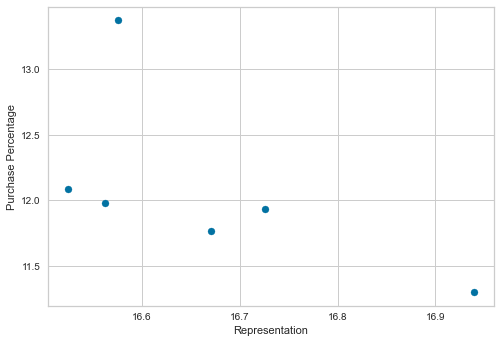

In [79]:
print('Representation Percentage=',(representation_percentage))
print('Total representation=', sum(representation_percentage))
print('Purchase Percentage=',purchase_percentage)
print('Total weighted purchase percentage=', np.dot(representation_percentage, purchase_percentage) / 100)
import matplotlib.pyplot as plt
plt.scatter(representation_percentage,purchase_percentage)
plt.xlabel('Representation')
plt.ylabel('Purchase Percentage')
plt.show()

/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


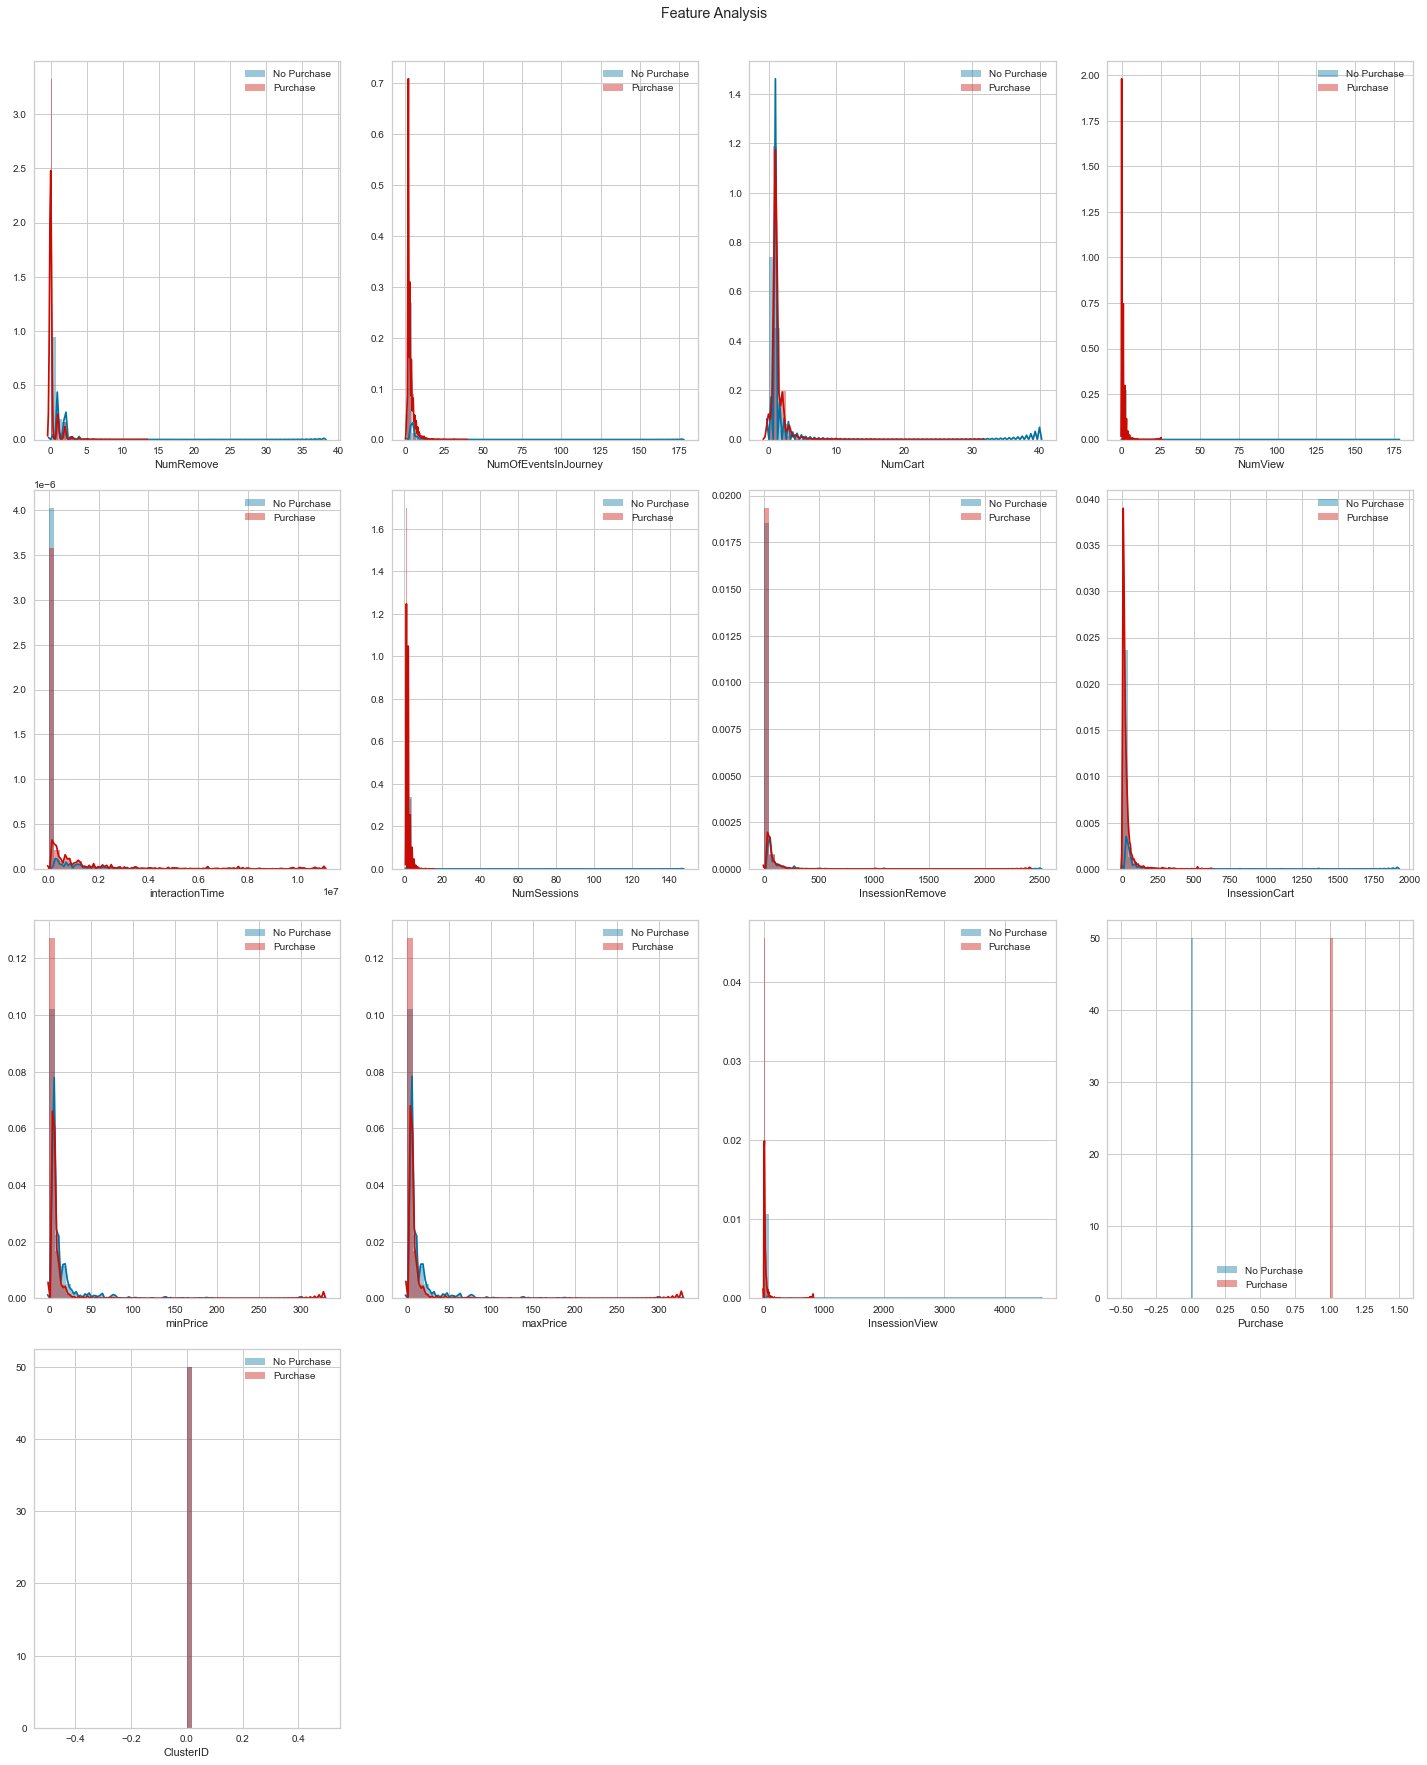

In [90]:
# Next, to analyze composition of each cluster
#Cluster 0
result = X_tsne.loc[X_tsne['ClusterID'] == 0]


fig = plt.figure(figsize = (20, 25))
j = 0
for i,item in enumerate(result.columns):
    plt.subplot(4, 4, j+1)
    j += 1
#     if(i==12):
#          sb.countplot(x='weekday', hue='Purchase', data=result)
#     elif(i==13):
#          sb.countplot(x='timeOfDay', hue='Purchase', data=result)
#     else:
#         item=None
    sb.distplot(result[item][result['Purchase']==0], color='b', label = 'No Purchase')
    sb.distplot(result[item][result['Purchase']==1], color='r', label = 'Purchase')
    plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


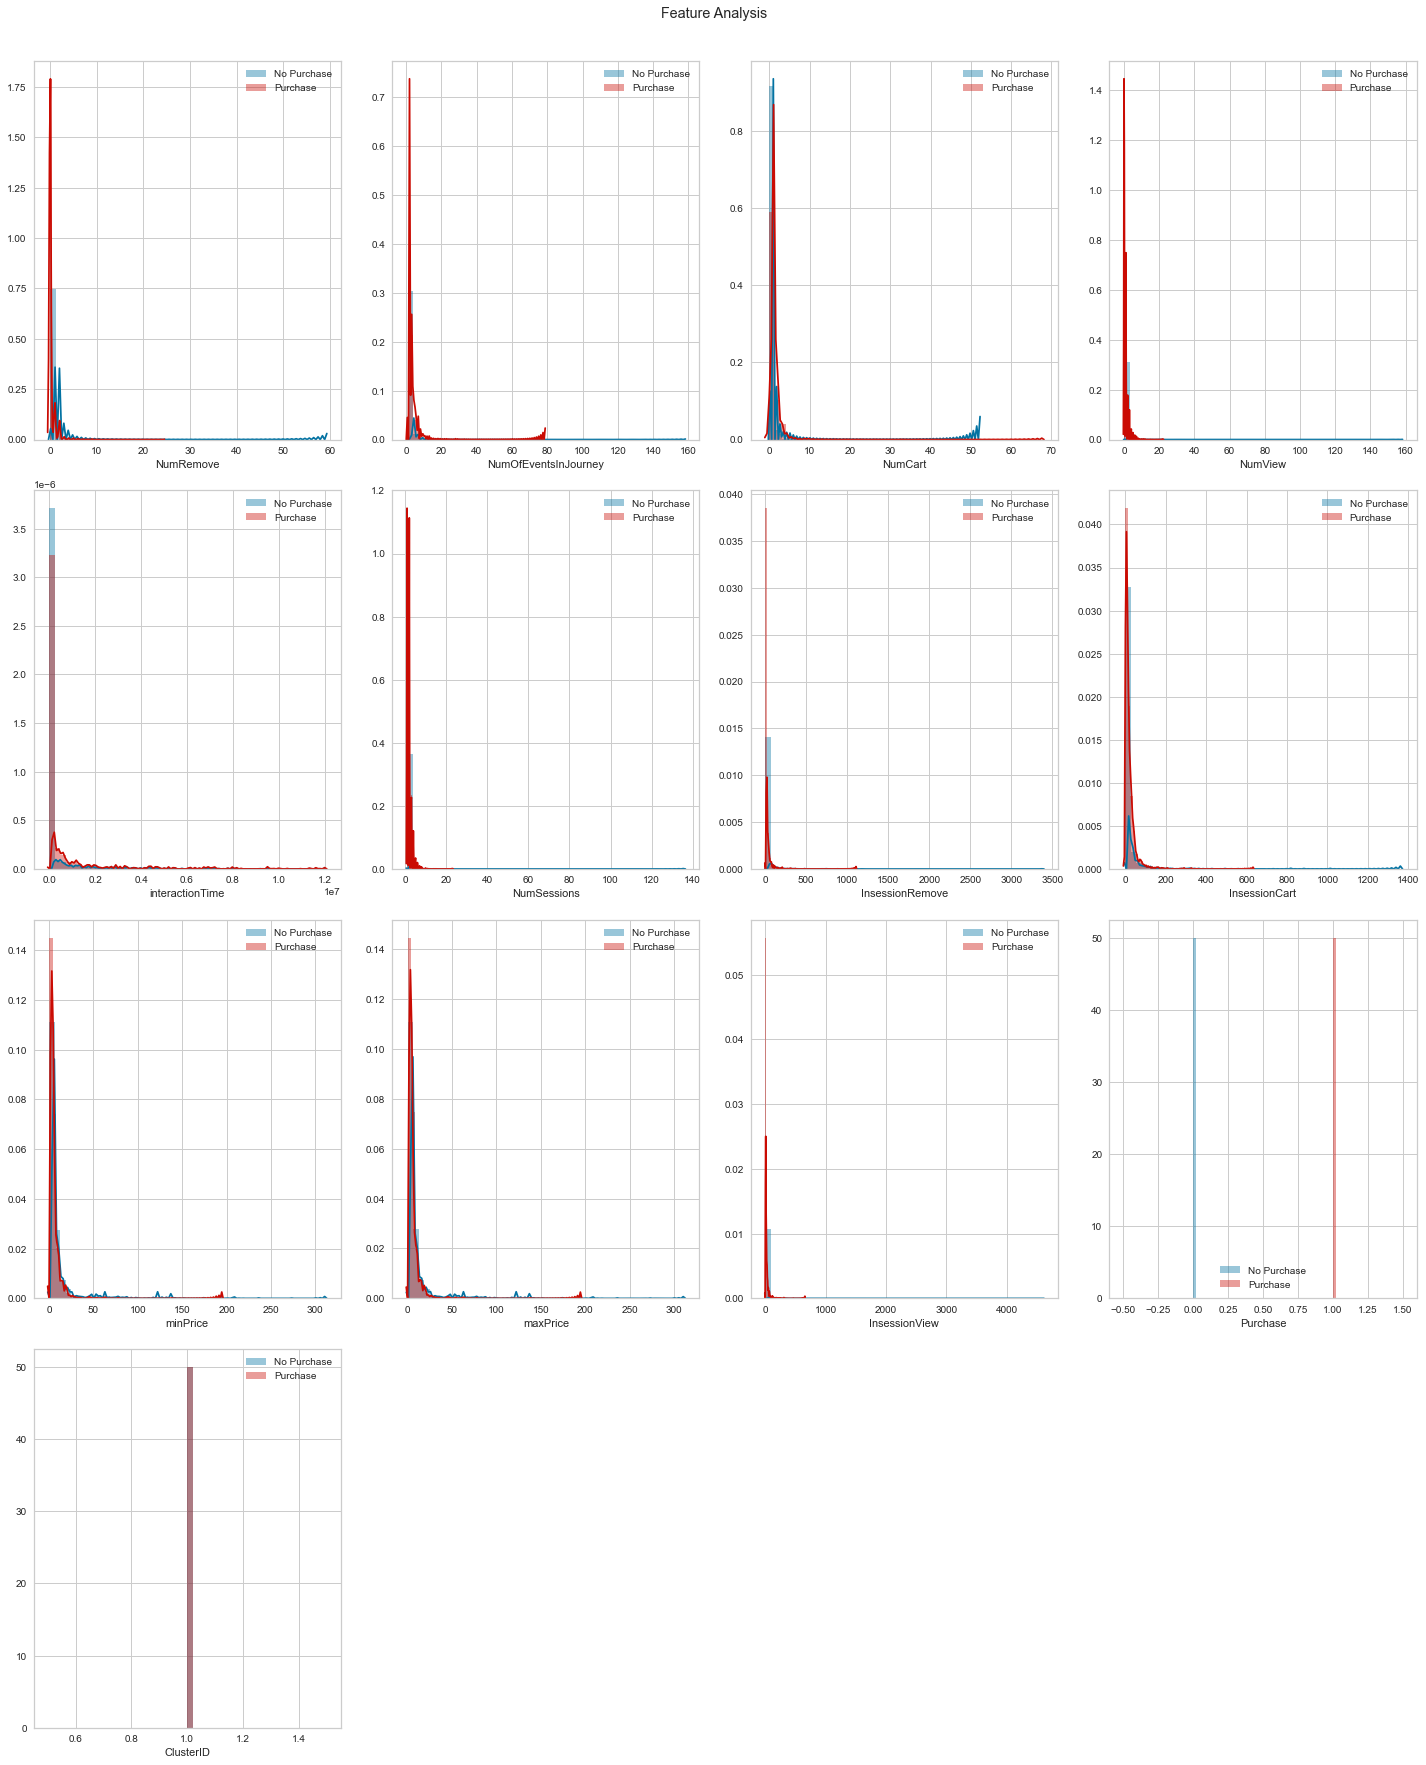

In [91]:
# Next, to analyze composition of each cluster
#Cluster 1
result = X_tsne.loc[X_tsne['ClusterID'] == 1]


fig = plt.figure(figsize = (20, 25))
j = 0
for i,item in enumerate(result.columns):
    plt.subplot(4, 4, j+1)
    j += 1
#     if(i==12):
#          sb.countplot(x='weekday', hue='Purchase', data=result)
#     elif(i==13):
#          sb.countplot(x='timeOfDay', hue='Purchase', data=result)
#     else:
#         item=None
    sb.distplot(result[item][result['Purchase']==0], color='b', label = 'No Purchase')
    sb.distplot(result[item][result['Purchase']==1], color='r', label = 'Purchase')
    plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


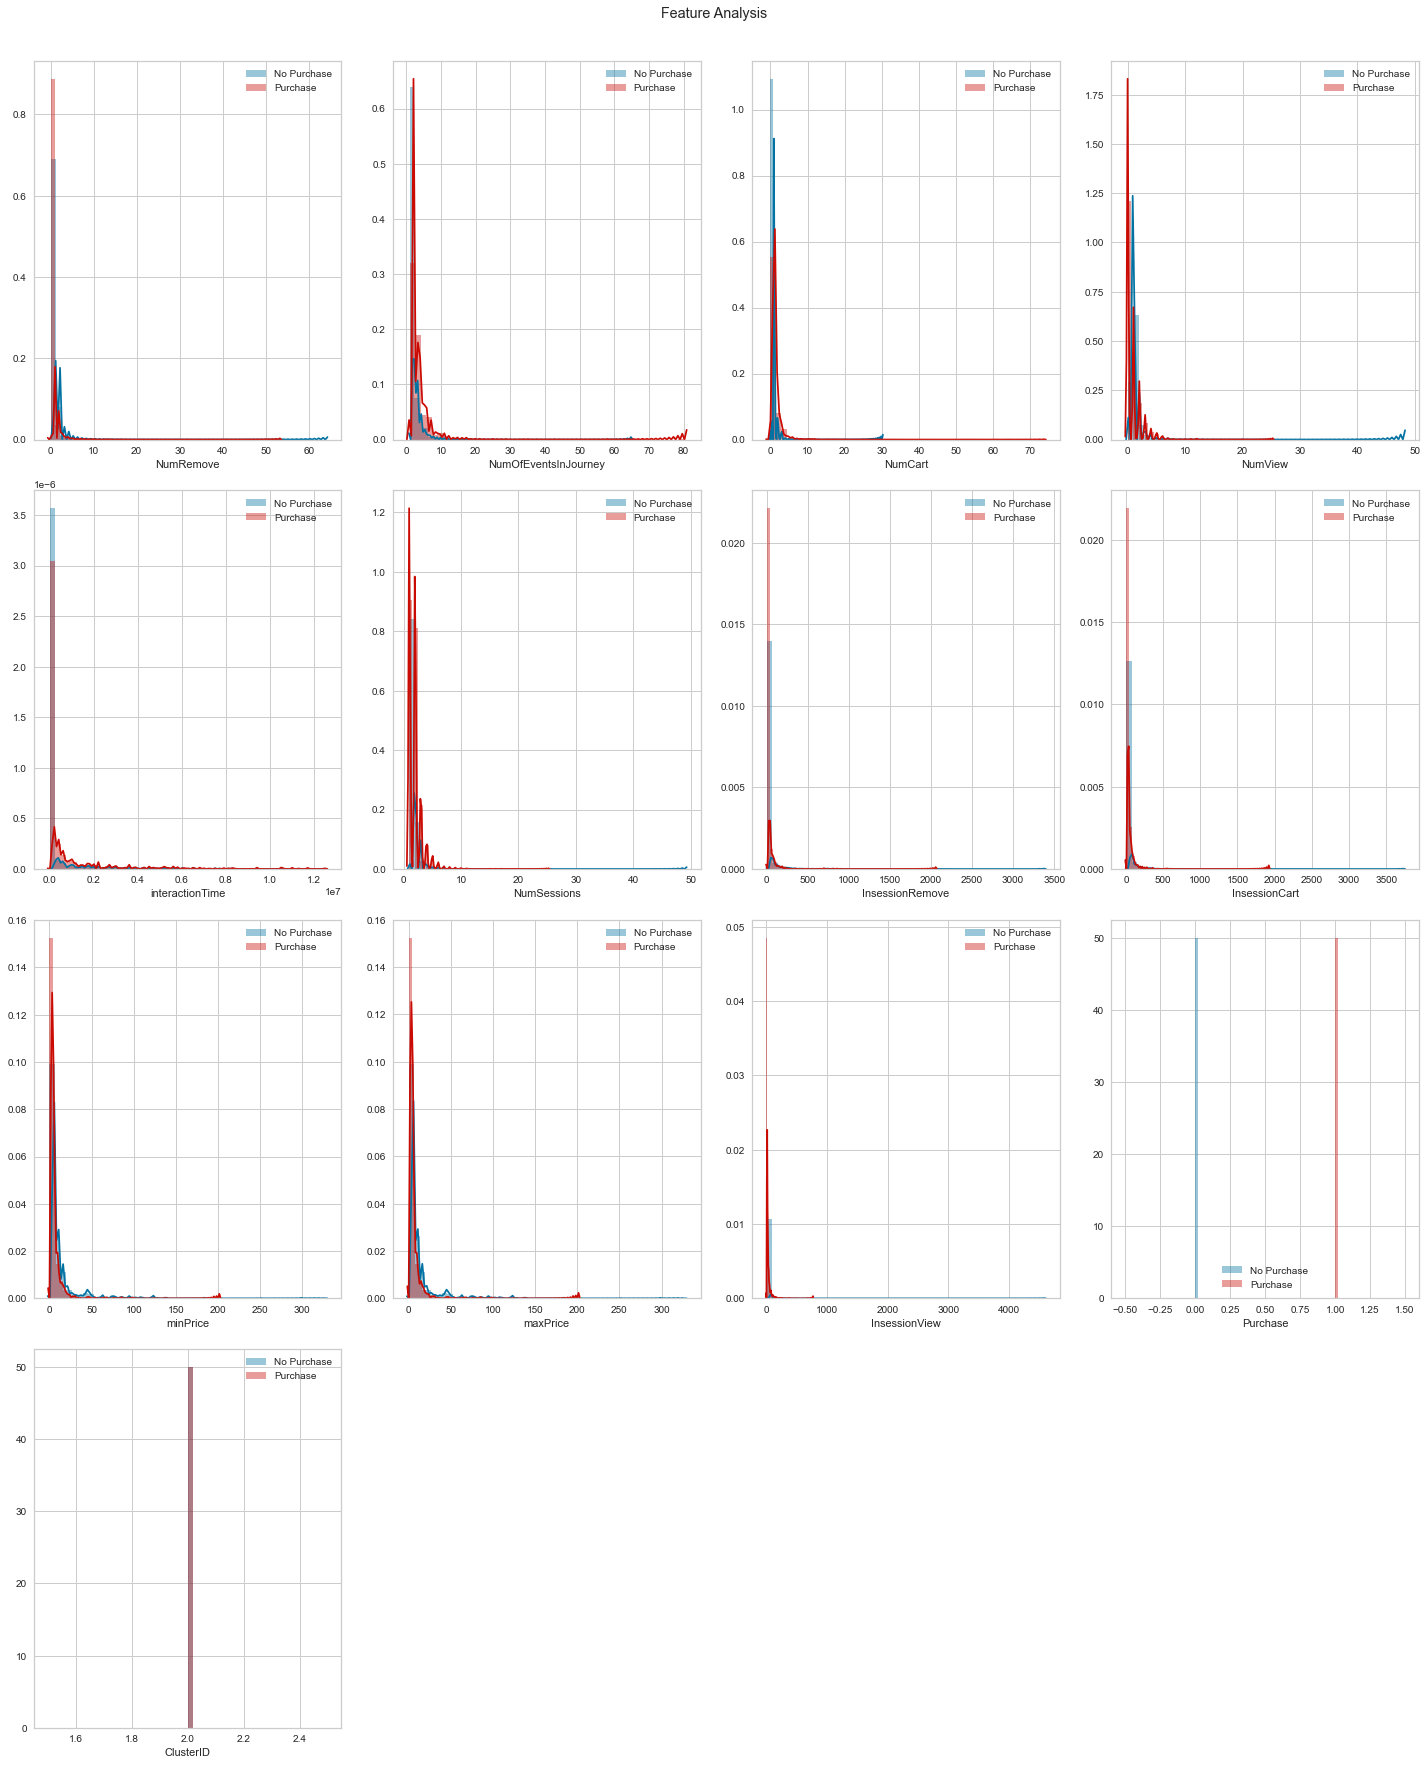

In [92]:
# Next, to analyze composition of each cluster
#Cluster 2
result = X_tsne.loc[X_tsne['ClusterID'] == 2]


fig = plt.figure(figsize = (20, 25))
j = 0
for i,item in enumerate(result.columns):
    plt.subplot(4, 4, j+1)
    j += 1
#     if(i==12):
#          sb.countplot(x='weekday', hue='Purchase', data=result)
#     elif(i==13):
#          sb.countplot(x='timeOfDay', hue='Purchase', data=result)
#     else:
#         item=None
    sb.distplot(result[item][result['Purchase']==0], color='b', label = 'No Purchase')
    sb.distplot(result[item][result['Purchase']==1], color='r', label = 'Purchase')
    plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


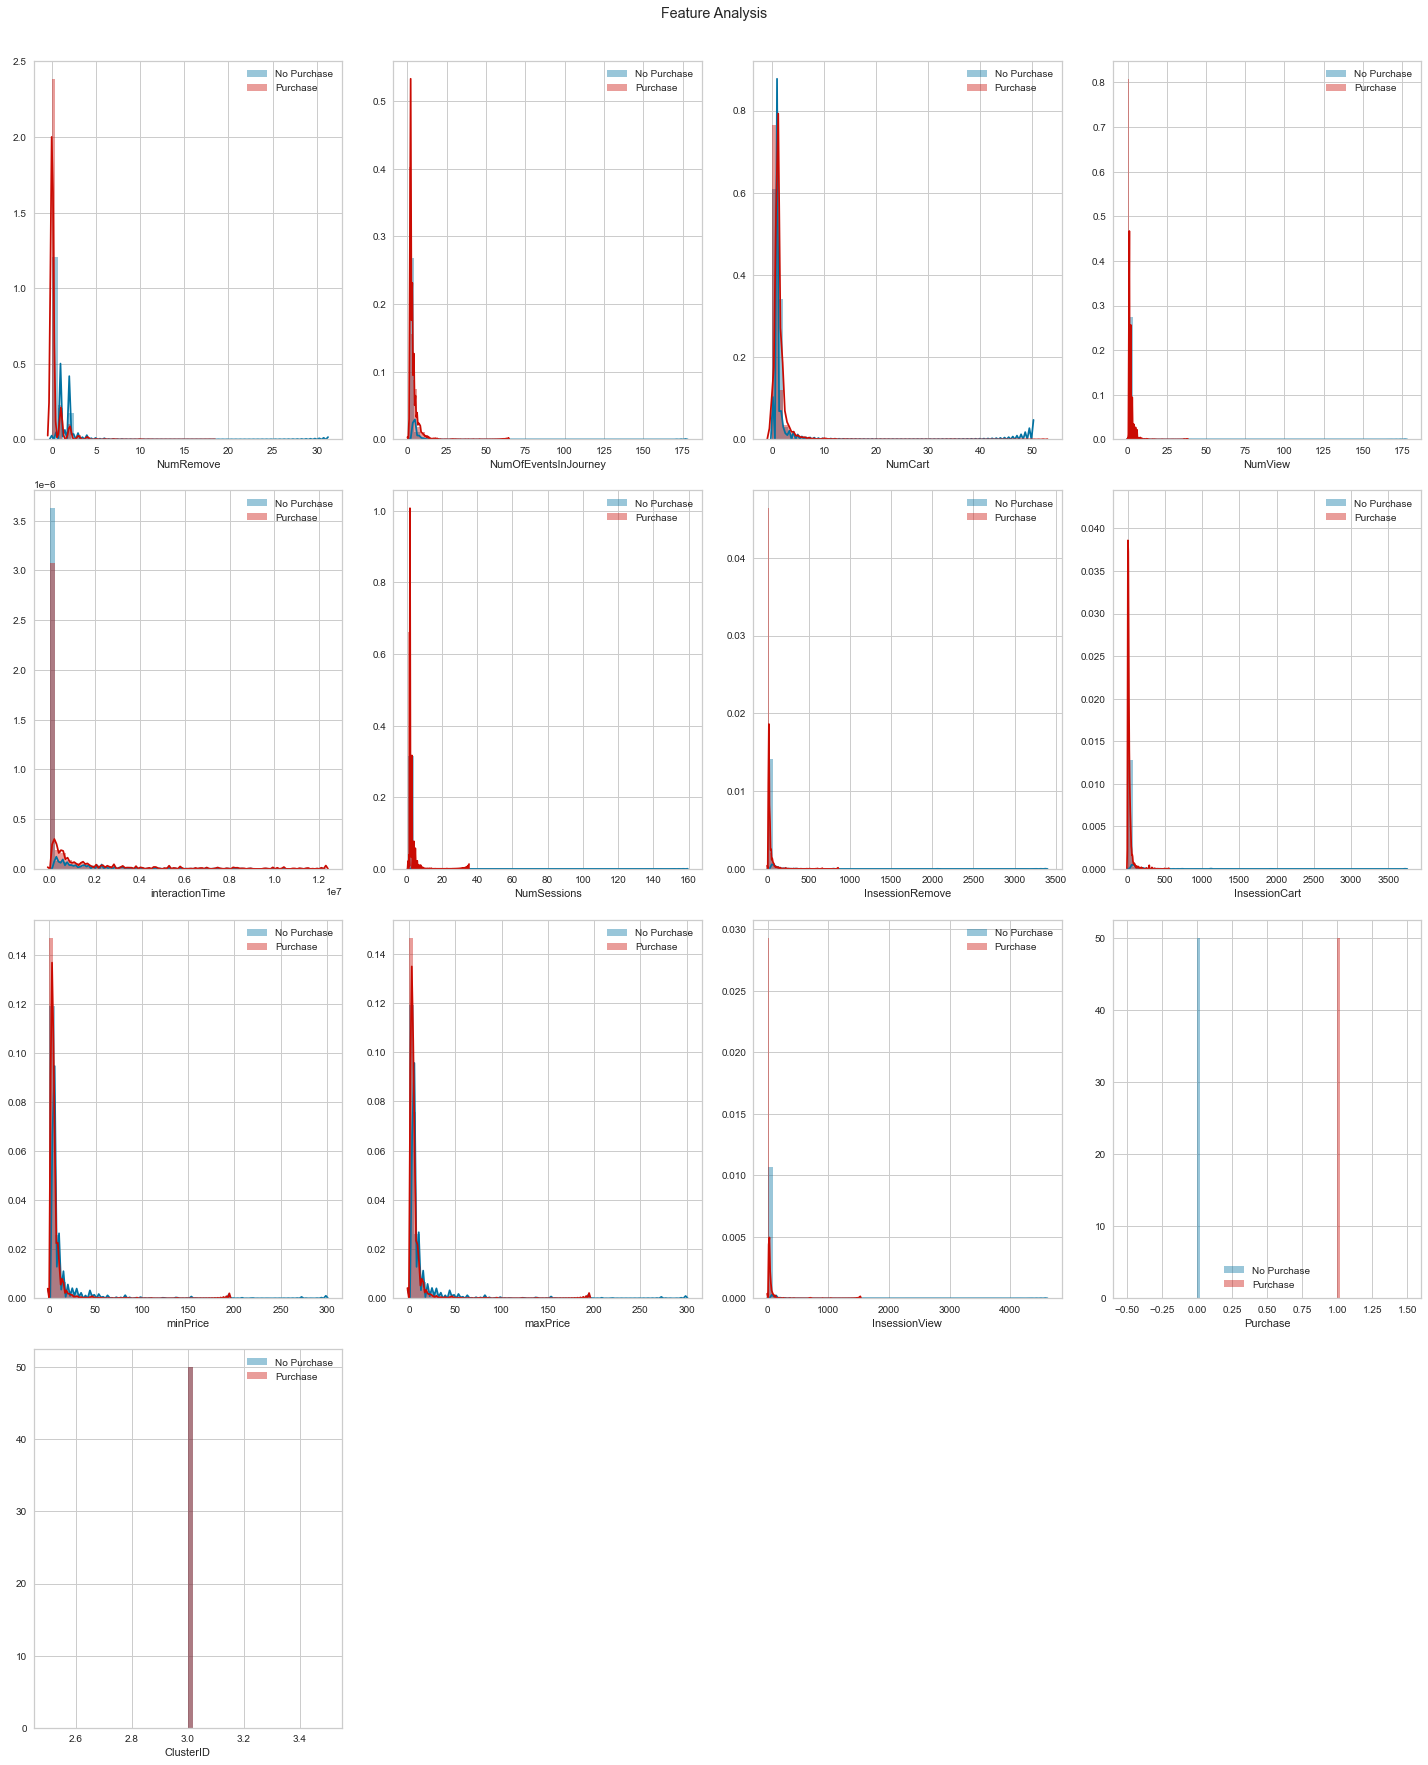

In [93]:
# Next, to analyze composition of each cluster
#Cluster 3
result = X_tsne.loc[X_tsne['ClusterID'] == 3]


fig = plt.figure(figsize = (20, 25))
j = 0
for i,item in enumerate(result.columns):
    plt.subplot(4, 4, j+1)
    j += 1
#     if(i==12):
#          sb.countplot(x='weekday', hue='Purchase', data=result)
#     elif(i==13):
#          sb.countplot(x='timeOfDay', hue='Purchase', data=result)
#     else:
#         item=None
    sb.distplot(result[item][result['Purchase']==0], color='b', label = 'No Purchase')
    sb.distplot(result[item][result['Purchase']==1], color='r', label = 'Purchase')
    plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


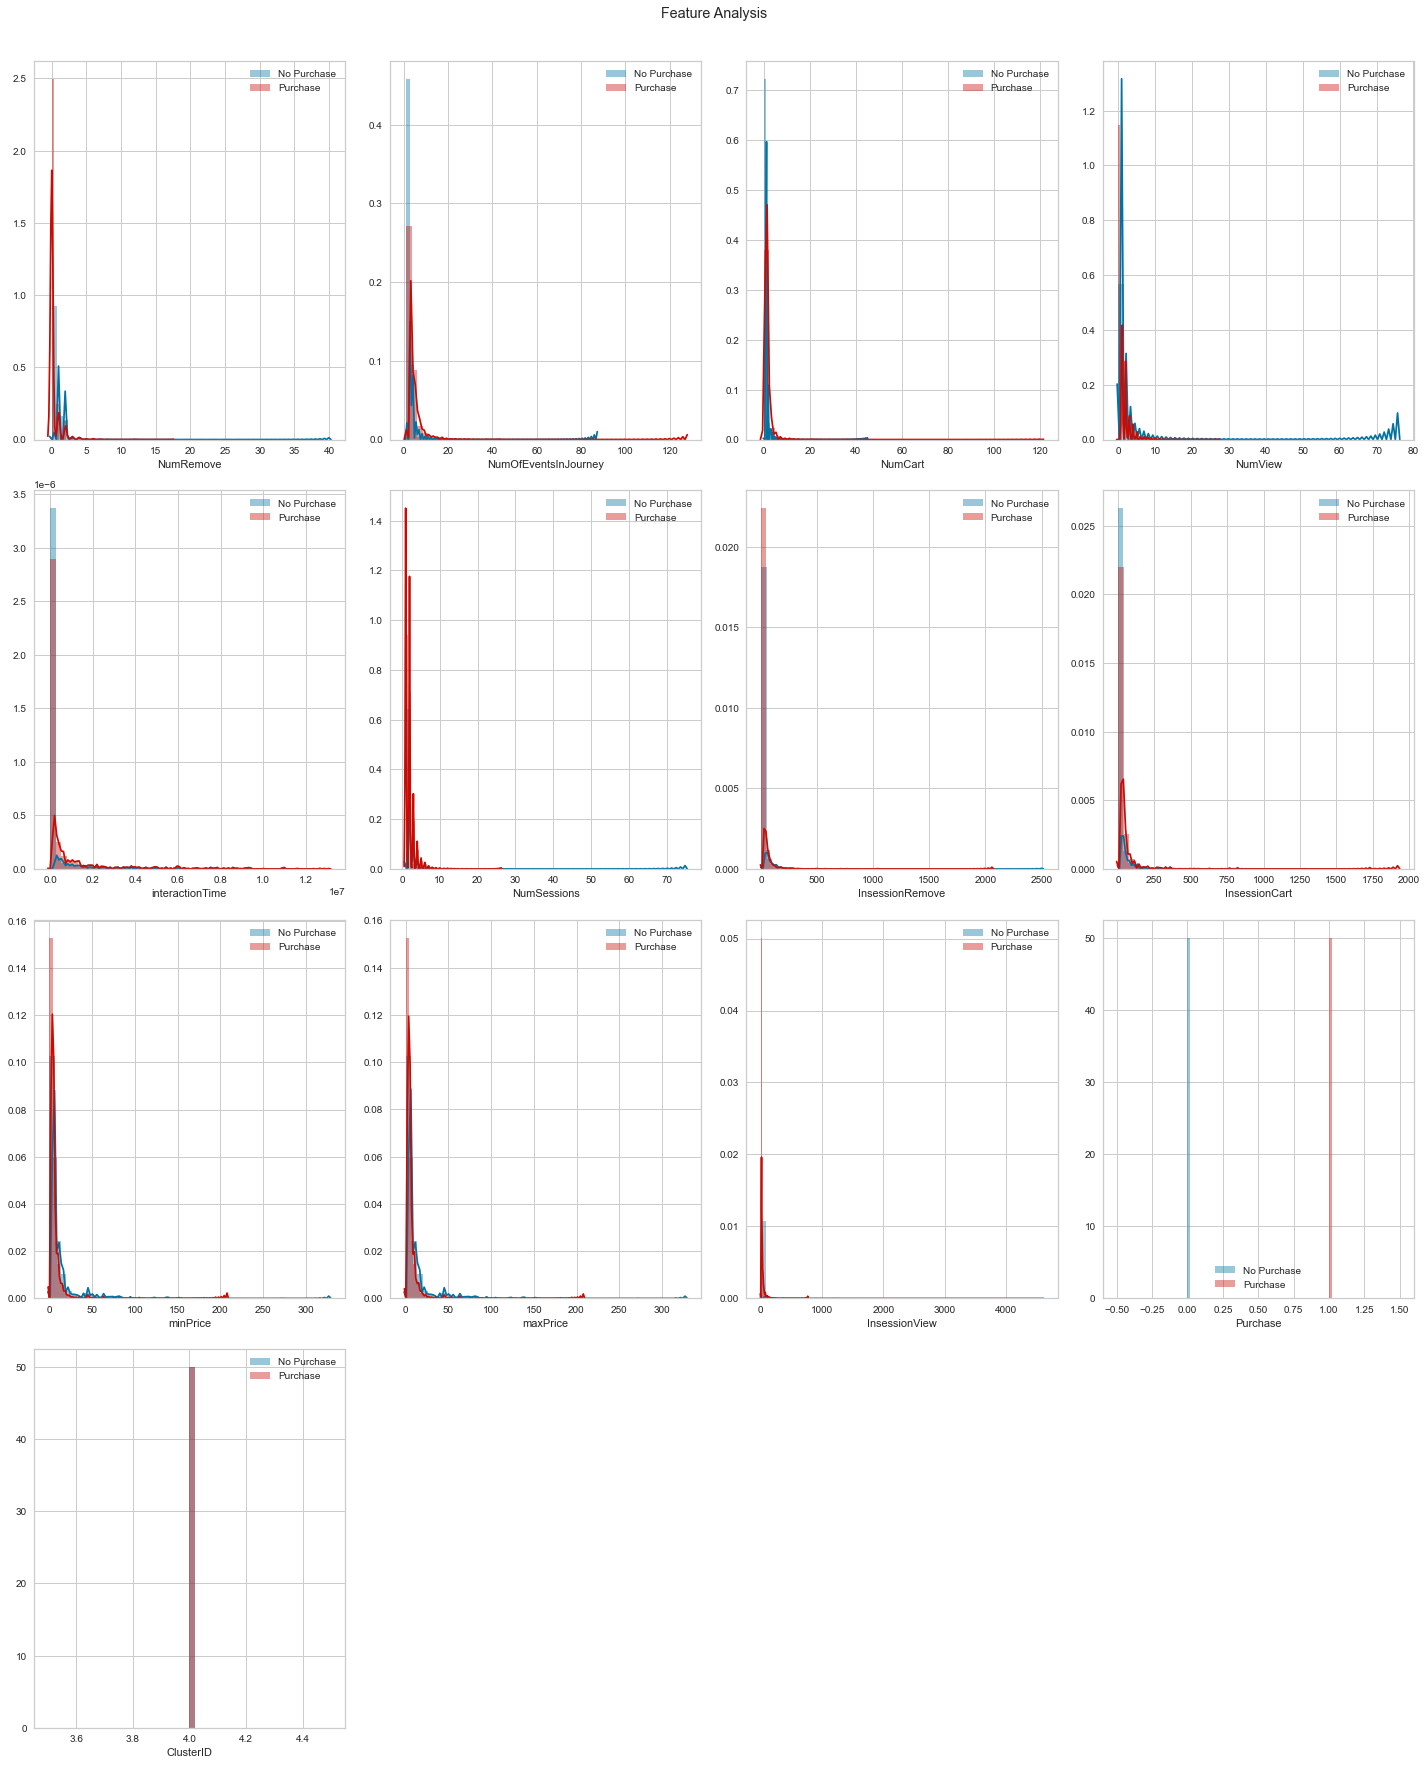

In [94]:
# Next, to analyze composition of each cluster
#Cluster 4
result = X_tsne.loc[X_tsne['ClusterID'] == 4]


fig = plt.figure(figsize = (20, 25))
j = 0
for i,item in enumerate(result.columns):
    plt.subplot(4, 4, j+1)
    j += 1
#     if(i==12):
#          sb.countplot(x='weekday', hue='Purchase', data=result)
#     elif(i==13):
#          sb.countplot(x='timeOfDay', hue='Purchase', data=result)
#     else:
#         item=None
    sb.distplot(result[item][result['Purchase']==0], color='b', label = 'No Purchase')
    sb.distplot(result[item][result['Purchase']==1], color='r', label = 'Purchase')
    plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/Users/leo/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


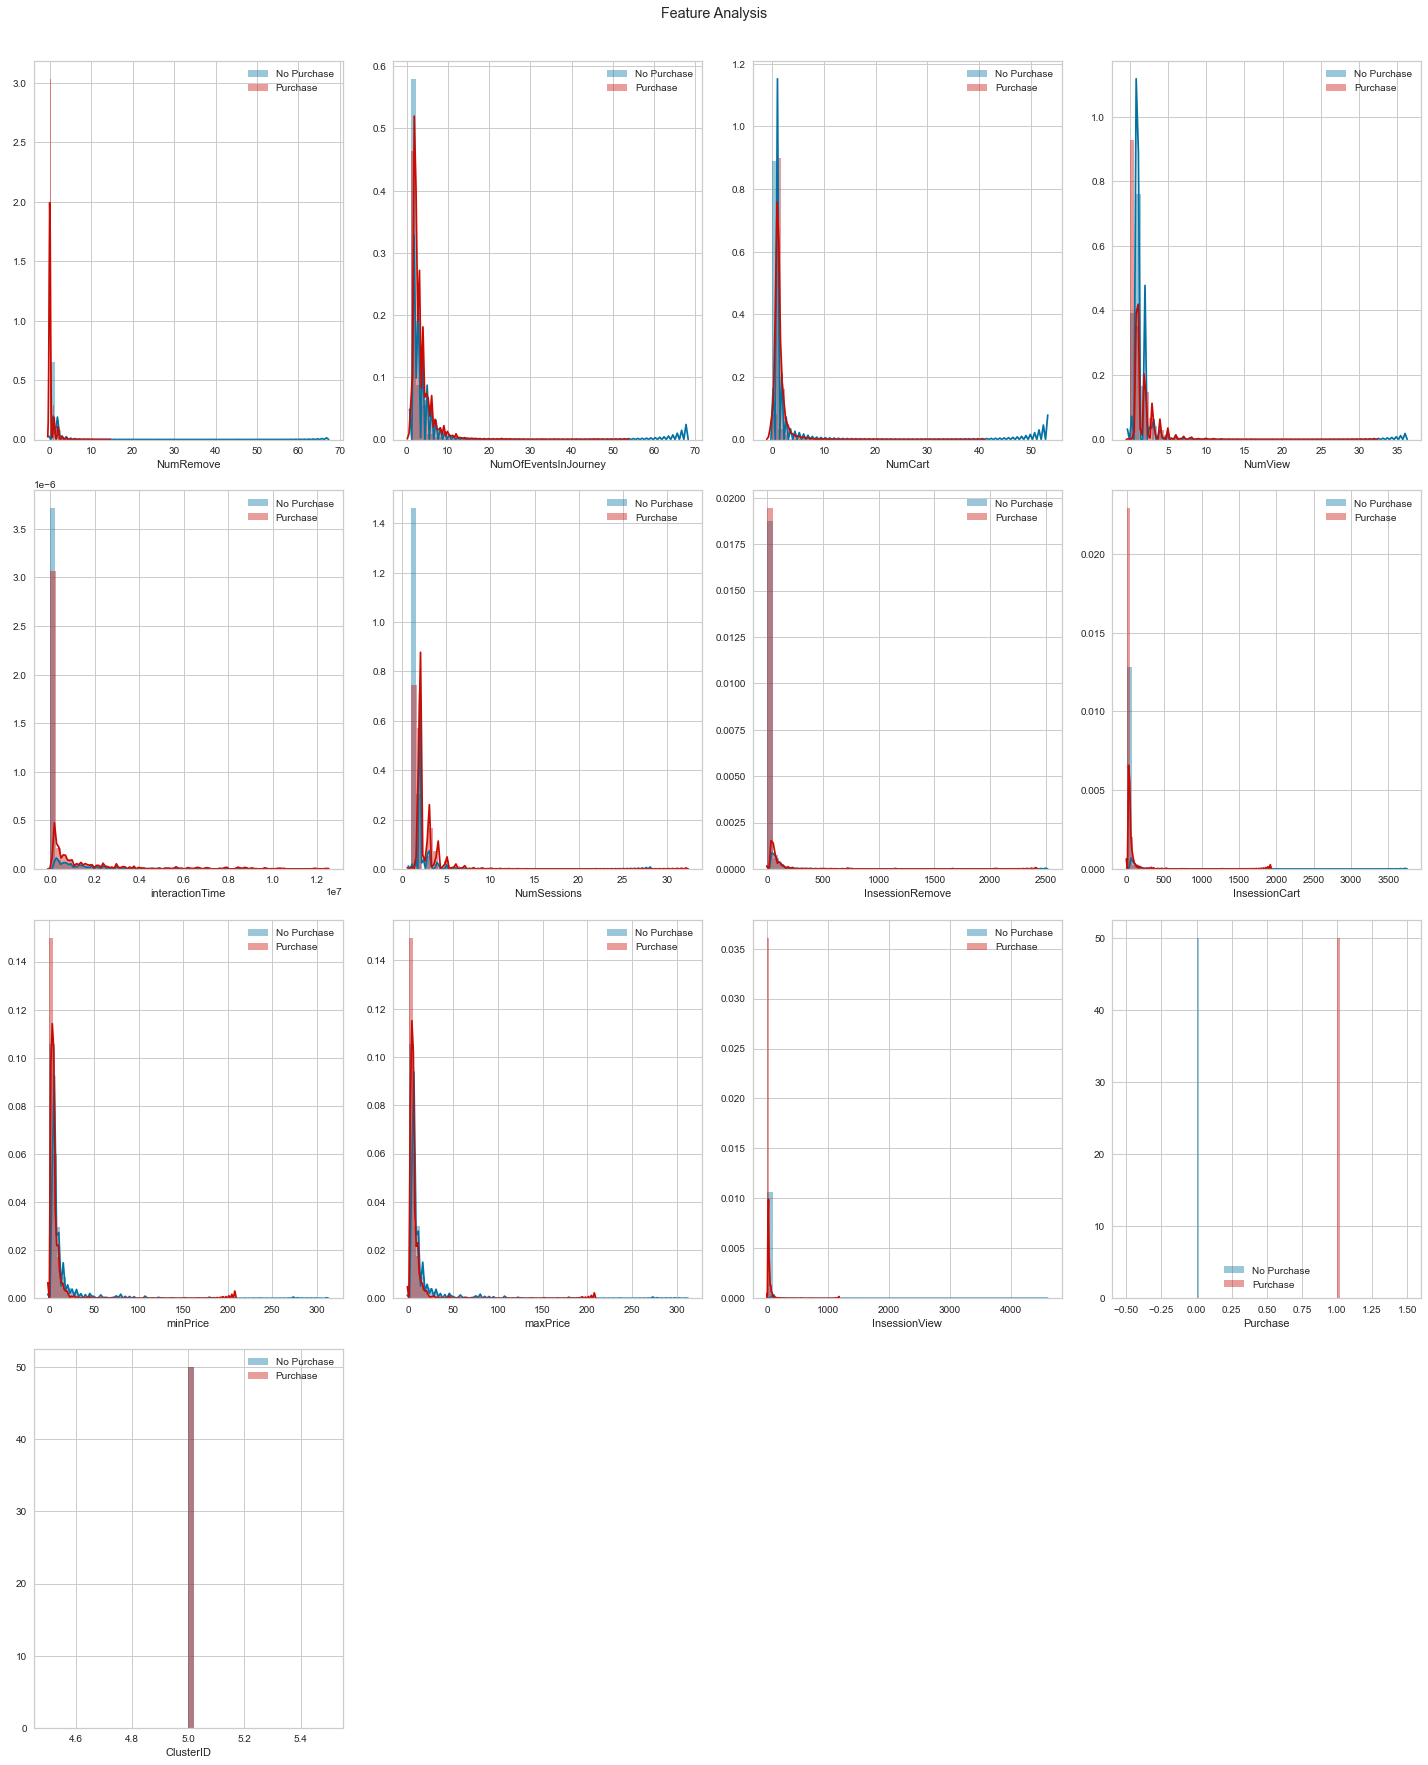

In [95]:
# Next, to analyze composition of each cluster
#Cluster 5
result = X_tsne.loc[X_tsne['ClusterID'] == 5]


fig = plt.figure(figsize = (20, 25))
j = 0
for i,item in enumerate(result.columns):
    plt.subplot(4, 4, j+1)
    j += 1
#     if(i==12):
#          sb.countplot(x='weekday', hue='Purchase', data=result)
#     elif(i==13):
#          sb.countplot(x='timeOfDay', hue='Purchase', data=result)
#     else:
#         item=None
    sb.distplot(result[item][result['Purchase']==0], color='b', label = 'No Purchase')
    sb.distplot(result[item][result['Purchase']==1], color='r', label = 'Purchase')
    plt.legend(loc='best')
fig.suptitle('Feature Analysis')
fig.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

## 2.d. Top 2 discriminating features to separate purchase from no-purchase per cluster
### Cluster 0:
NumOfEventsInJourney (no purchase has more events), Max/MinPrice (no purchase had higher prices)
### Cluster 1:
NumRemove (no purchase has more items removed), NumCart (a significant portion of no purchase users have many more items in their cart)
### Cluster 2:
NumOfEventsInJourney (no purchase has fewer events), interactionTime (no purchase has fewer)
### Cluster 3:
NumRemove (no purchase has more items removed), InsessionView (no purchase has more viewed)
### Cluster 4:
NumRemove (no purchase has more items removed), NumView (no purchase has more viewed)
### Cluster 5:
NumSessions (no purchase has fewer sessions), NumCart (no purchase has more in the cart)

### DBSCAN: 3 (useful) clusters

In [132]:
# Played around with these parameters to get a reasonable number of clusters.
dbscan = DBSCAN(eps=2.0, min_samples=5).fit(X_red_t)
value_counts = np.unique(dbscan.labels_, return_counts=True)
unique_values = value_counts[0]
print('Number of clusters: {0}'.format(max(dbscan.labels_) + 1))
print('Value count:\n{0}\n{1}'.format(value_counts[0], value_counts[1]))

Number of clusters: 145
Value count:
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144]
[229873    309     97     77    103    103    271    317    132    676
    555    250     46    135     34    182    510     28    295    301
    180     52     37    170     68     83    174    248    163    172
    228     52    438    184    288    136     91     67    121    132
    198    533    251    152     44    245    113    613     35    154
    116    251    

In [133]:
print(dbscan.labels_.shape)
print(unique_values)

(250000,)
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144]


In [134]:
# Initialize the percentages as arrays of zeros, with each zero representing a unique cluster ID
purchase_percentage = np.zeros(unique_values.shape)
representation_percentage = np.zeros(unique_values.shape)
# Loop through the clusters
for index, item in enumerate(unique_values):
    locations = np.where(dbscan.labels_ == item)[0]
    purchase = X_tsne['Purchase'][locations]
    representation_percentage[index] = 100 * locations.shape[0] / X_train.shape[0]
    purchase_percentage[index] = 100 * sum(purchase) / locations.shape[0]

Representation Percentage= [9.19492e+01 1.23600e-01 3.88000e-02 3.08000e-02 4.12000e-02 4.12000e-02
 1.08400e-01 1.26800e-01 5.28000e-02 2.70400e-01 2.22000e-01 1.00000e-01
 1.84000e-02 5.40000e-02 1.36000e-02 7.28000e-02 2.04000e-01 1.12000e-02
 1.18000e-01 1.20400e-01 7.20000e-02 2.08000e-02 1.48000e-02 6.80000e-02
 2.72000e-02 3.32000e-02 6.96000e-02 9.92000e-02 6.52000e-02 6.88000e-02
 9.12000e-02 2.08000e-02 1.75200e-01 7.36000e-02 1.15200e-01 5.44000e-02
 3.64000e-02 2.68000e-02 4.84000e-02 5.28000e-02 7.92000e-02 2.13200e-01
 1.00400e-01 6.08000e-02 1.76000e-02 9.80000e-02 4.52000e-02 2.45200e-01
 1.40000e-02 6.16000e-02 4.64000e-02 1.00400e-01 8.00000e-02 8.72000e-02
 7.08000e-02 1.20000e-02 9.00000e-02 8.16000e-02 9.52000e-02 5.24000e-02
 3.80000e-02 8.52000e-02 5.60000e-02 1.74800e-01 4.24000e-02 9.00000e-02
 1.44000e-02 5.16000e-02 2.84000e-02 2.84000e-02 9.60000e-02 3.36000e-02
 1.08400e-01 9.96000e-02 2.84000e-02 4.52000e-02 9.36000e-02 2.84000e-02
 4.64000e-02 4.72000e-02

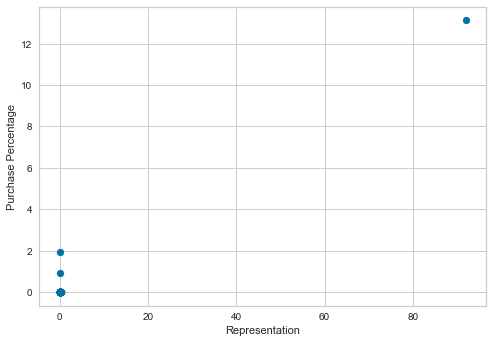

In [135]:
print('Representation Percentage=',(representation_percentage))
print('Total representation=', sum(representation_percentage))
print('Purchase Percentage=',purchase_percentage)
print('Total weighted purchase percentage=', np.dot(representation_percentage, purchase_percentage) / 100)
import matplotlib.pyplot as plt
plt.scatter(representation_percentage,purchase_percentage)
plt.xlabel('Representation')
plt.ylabel('Purchase Percentage')
plt.show()

## K-Means vs. DBSCAN for t-SNE-reduced features
Empirically, k-means gives us more informative clusters than DBSCAN on t-SNE-reduced features. Even after some significant hyperparameter tuning, DBSCAN tends to create one big cluster that maintains the same purchase distribution as the underlying dataset, and then a bunch of outlier clusters. K-Means clusters nicely into customer archetypes (e.g., impulse buyer, browser, etc.). So, we don't look further into the DBSCAN clusters.

# Summary

## 1. Apply DBSCAN to PCA-reduced data samples to allocate cluster IDs to all 250k samples.

### 1.a. Number of clusters
DBSCAN: 2 (useful) clusters

### 1.b. Representation percentage
[41.5576, 49.7788, 0.624000, (all other values infinitesimal) ... ]

### 1.c. Purchase ratio
[27.04583518, 1.09845959, 0. ... ]

### 1.d. Top 2 discriminating features to separate purchase from no-purchase per cluster
#### Cluster -1 (even though this is for outliers, we'll treat it as a cluster for the sake of analysis):
Almost all of the purchases are categorized as outliers. NumRemove (no purchase is greater), NumCart (no purchase is greater)
#### Cluster 0:
NumView (no purchase has 1 at far greater frequency), InSessionRemove (no purchase has fewer)

## 2. Apply either k-means or DBSCAN to t-SNE-reduced data samples to allocate cluster IDs to all 250k samples. Use the full dataset during t-SNE.

### 2.a. Number of clusters
k-means: 6 clusters

DBSCAN: 3 (useful) clusters

### 2.b. Representation percentage
k-means: [16.5756, 16.6712, 16.9392, 16.5628, 16.5248, 16.7264]

DBSCAN: [91.9492, 0.123600, (all other values infinitesimal) ... ]

### 2.c. Purchase ratio
k-means: [13.37387485, 11.76160084, 11.29687352, 11.97865095, 12.08849729, 11.93083987]

DBSCAN: [13.12420336, 1.92307692, 0.94339623]

### 2.d. Top 2 discriminating features to separate purchase from no-purchase per cluster (k-Means)
#### Cluster 0:
NumOfEventsInJourney (no purchase has more events), Max/MinPrice (no purchase had higher prices)
#### Cluster 1:
NumRemove (no purchase has more items removed), NumCart (a significant portion of no purchase users have many more items in their cart)
#### Cluster 2:
NumOfEventsInJourney (no purchase has fewer events), interactionTime (no purchase has fewer)
#### Cluster 3:
NumRemove (no purchase has more items removed), InsessionView (no purchase has more viewed)
#### Cluster 4:
NumRemove (no purchase has more items removed), NumView (no purchase has more viewed)
#### Cluster 5:
NumSessions (no purchase has fewer sessions), NumCart (no purchase has more in the cart)

# Conclusion

## t-SNE vs. PCA
PCA is a much faster algorithm than t-SNE, although the latter is generally considered a more robust algorithm. That said, on this dataset, there appears to be little benefit to using t-SNE, as the clustering produces worse results when using both k-means and DBSCAN.

## DBSCAN vs. k-means
K-means is a simple algorithm that requires the user to know how many clusters are in the dataset. DBSCAN finds the number of clusters, but requires 2 other hyperparameters that are difficult to tune, at least on this dataset. When combined with the elbow method, k-means produces far more useful clusterings on the dataset.